In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib_venn import venn2, venn3

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

xlim=(-10,3)
ylim=(-12, 4)
alpha=1
marker='.'
legend=False

In [3]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05), "Significant"] = "FDR<0.05"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [4]:
def plot_MA(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["black", "blue"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)

In [5]:
def merge_df(df_1, df_2):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="inner")
    df["Significant"] = "No"
    return df

In [6]:
def plot_FC_correlation(df, FC_1_name, FC_2_name, hue, hue_order):

    """Plot correlation between FCs"""

    sns_plot = sns.lmplot(f"logFC_{FC_1_name}",
                          y=f"logFC_{FC_2_name}",
                          data=df,
                          fit_reg=False,
                          hue=hue,
                          hue_order=hue_order,
                          palette=["grey", "black", "blue", "red"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"FCs between {FC_1_name} and {FC_2_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    sns_plot.set(xlim=xlim, ylim=ylim)

    plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

In [7]:
def plot_FC_correlation_mark_genes(df, FC_1_name, FC_2_name, hue, hue_order):

    """Plot correlation between FCs"""

    sns_plot = sns.lmplot(f"logFC_{FC_1_name}",
                          y=f"logFC_{FC_2_name}",
                          data=df,
                          fit_reg=False,
                          hue=hue,
                          hue_order=hue_order,
                          palette=["grey", "black", "blue", "red"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"FCs between {FC_1_name} and {FC_2_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    sns_plot.set(xlim=xlim, ylim=ylim)

    plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}__MARK_GENES.pdf")

In [8]:
def compare(df_1_path, df_2_path, df_1_name, df_2_name):
    
    "Combine multiple functions"
    
    df_1 = prepare_df(df_1_path, df_1_name)
    plot_MA(df_1, df_1_name)
    df_2 = prepare_df(df_2_path, df_2_name)
    plot_MA(df_2, df_2_name)
    
    df_merged = merge_df(df_1, df_2)
    
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant")
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_1_name)
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_2_name)
    
    return df_merged

In [9]:
def plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name):

    df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

    df_all["Significant"] = "No"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"


    sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                          y=f"logFC_{df_2_name}",
                          data=df_all,
                          fit_reg=False,
                          hue=f"Significant",
                          hue_order=["No", f"FDR_{df_2_name}<0.05", f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"],
                          palette=["black", "blue", "red"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)


    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    # sns_plot.set(xlim=xlim, ylim=ylim)

    print(pd.DataFrame(df_all["Significant"].value_counts()))

In [10]:
# Input prefix
small_rna_prefix = "../../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

ip_prefix = "../../04_csr1_ip_and_wago_double_mutants/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

ip_prefix_first = "../../03_WAGO_IPs/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

In [11]:
suffix = "/DE_edgeR/final_table_with_gene_info.tsv"

In [12]:
# Input files

# small_RNAs

# WT Dpf_3_null
small_rna__WT__Dpf_3_null_path = small_rna_prefix + "WT__Dpf_3_null" + suffix
small_rna__WT__Dpf_3_null_name = "Dpf_3_null__over__WT"

small_rna__WT_A_B_C__Dpf_3_null_path = small_rna_prefix + "WT_A_B_C__Dpf_3_null" + suffix
small_rna__WT_A_B_C__Dpf_3_null_name = "Dpf_3_null__over__WT_A_B_C"

small_rna__WT_D_E_F__Dpf_3_null_path = small_rna_prefix + "WT_D_E_F__Dpf_3_null" + suffix
small_rna__WT_D_E_F__Dpf_3_null_name = "Dpf_3_null__over__WT_D_E_F"

# WT Dpf_3_S784A
small_rna__WT__Dpf_3_S784A_path = small_rna_prefix + "WT__Dpf_3_S784A" + suffix
small_rna__WT__Dpf_3_S784A_name = "Dpf_3_S784A__over__WT"

small_rna__WT_A_B_C__Dpf_3_S784A_path = small_rna_prefix + "WT_A_B_C__Dpf_3_S784A" + suffix
small_rna__WT_A_B_C__Dpf_3_S784A_name = "Dpf_3_S784A__over__WT_A_B_C"

small_rna__WT_D_E_F__Dpf_3_S784A_path = small_rna_prefix + "WT_D_E_F__Dpf_3_S784A" + suffix
small_rna__WT_D_E_F__Dpf_3_S784A_name = "Dpf_3_S784A__over__WT_D_E_F"


# WT mut_2
small_rna__WT__mut_2_path = small_rna_prefix + "WT__mut_2" + suffix
small_rna__WT__mut_2_name = "mut_2__over__WT"

small_rna__WT_A_B_C__mut_2_path = small_rna_prefix + "WT_A_B_C__mut_2" + suffix
small_rna__WT_A_B_C__mut_2_name = "mut_2__over__WT_A_B_C"

small_rna__WT_D_E_F__mut_2_path = small_rna_prefix + "WT_D_E_F__mut_2" + suffix
small_rna__WT_D_E_F__mut_2_name = "mut_2__over__WT_D_E_F"


# WT mut_7
small_rna__WT__mut_7_path = small_rna_prefix + "WT__mut_7" + suffix
small_rna__WT__mut_7_name = "mut_7__over__WT"

small_rna__WT_A_B_C__mut_7_path = small_rna_prefix + "WT_A_B_C__mut_7" + suffix
small_rna__WT_A_B_C__mut_7_name = "mut_7__over__WT_A_B_C"

small_rna__WT_D_E_F__mut_7_path = small_rna_prefix + "WT_D_E_F__mut_7" + suffix
small_rna__WT_D_E_F__mut_7_name = "mut_7__over__WT_D_E_F"

# 3134 Input
HW3134_INPUT__over__Input_WAGO_1_path = ip_prefix + "Input_WAGO-1__HW3134_INPUT" + suffix
HW3134_INPUT__over__Input_WAGO_1_name = "HW3134_INPUT__over__WAGO-1_Input"

# 3135 Input
HW3135_INPUT__over__Input_WAGO_1_path = ip_prefix + "Input_WAGO-1__HW3135_INPUT" + suffix
HW3135_INPUT__over__Input_WAGO_1_name = "HW3135_INPUT__over__WAGO-1_Input"

# WAGO_1_P3G_Input
Input_WAGO_1_P3G__over__Input_WAGO_1_path = ip_prefix_first + "Input_WAGO-1__Input_WAGO-1_P3G" + suffix
Input_WAGO_1_P3G__over__Input_WAGO_1_name = "WAGO-1-P3G_Input__over__WAGO-1_Input"

#### important note: we perform an inner join in the merge

## dpf-3 null over WT (A,B,C) vs Dpf-3 S784A over WT (D,E,F)

In [13]:
df_1_path = small_rna__WT_A_B_C__Dpf_3_null_path
df_1_name = small_rna__WT_A_B_C__Dpf_3_null_name

df_2_path = small_rna__WT_D_E_F__Dpf_3_S784A_path
df_2_name = small_rna__WT_D_E_F__Dpf_3_S784A_name

********************************************************************************
                                                                                                                                                    Significant
No                                                                                                                                                  1534       
FDR_Dpf_3_null__over__WT_A_B_C<0.05\nlogFC_Dpf_3_null__over__WT_A_B_C<0\nFDR_Dpf_3_S784A__over__WT_D_E_F<0.05\nlogFC_Dpf_3_S784A__over__WT_D_E_F<0  1146       
FDR_Dpf_3_null__over__WT_A_B_C<0.05\nlogFC_Dpf_3_null__over__WT_A_B_C<0                                                                             65         
FDR_Dpf_3_S784A__over__WT_D_E_F<0.05\nlogFC_Dpf_3_S784A__over__WT_D_E_F<0                                                                           60         
********************************************************************************
                                      

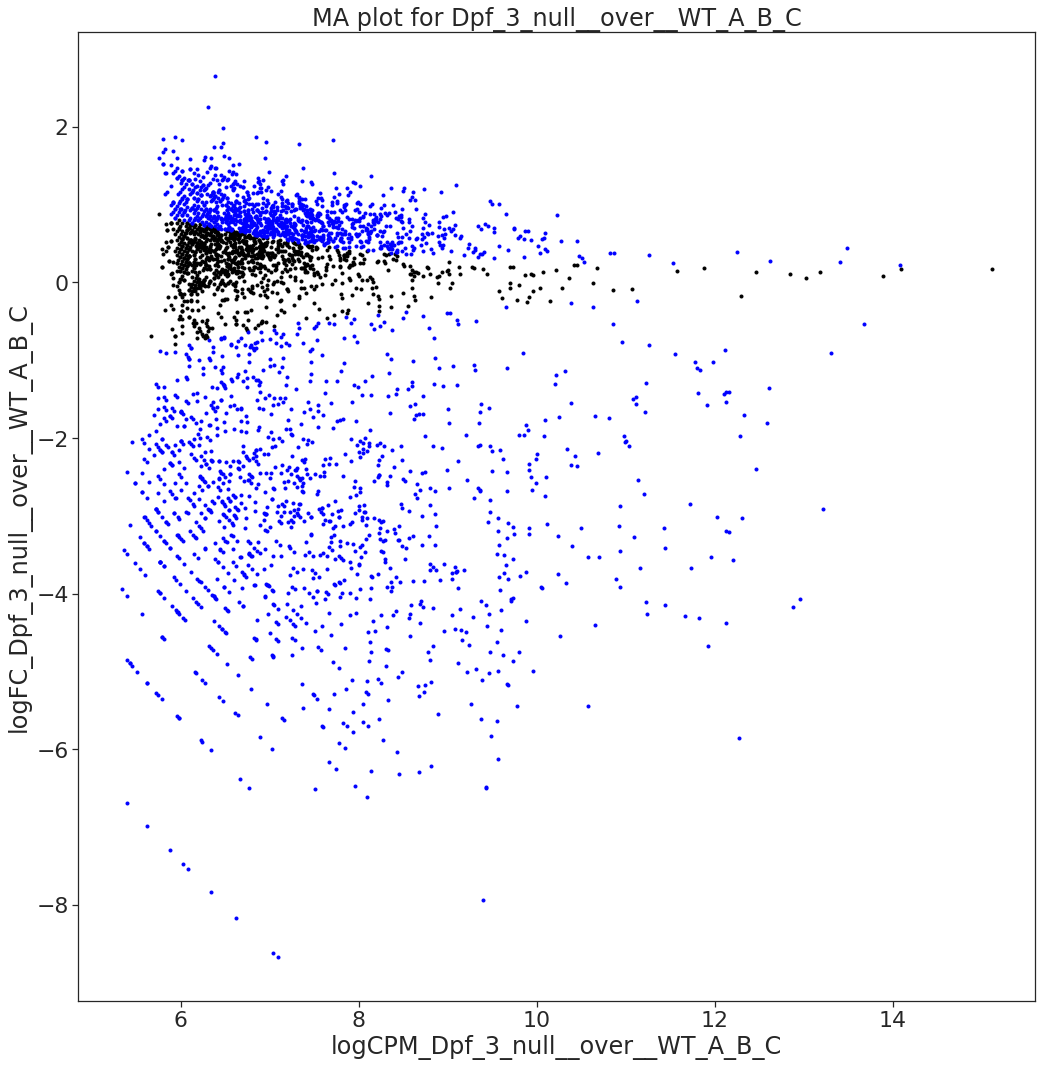

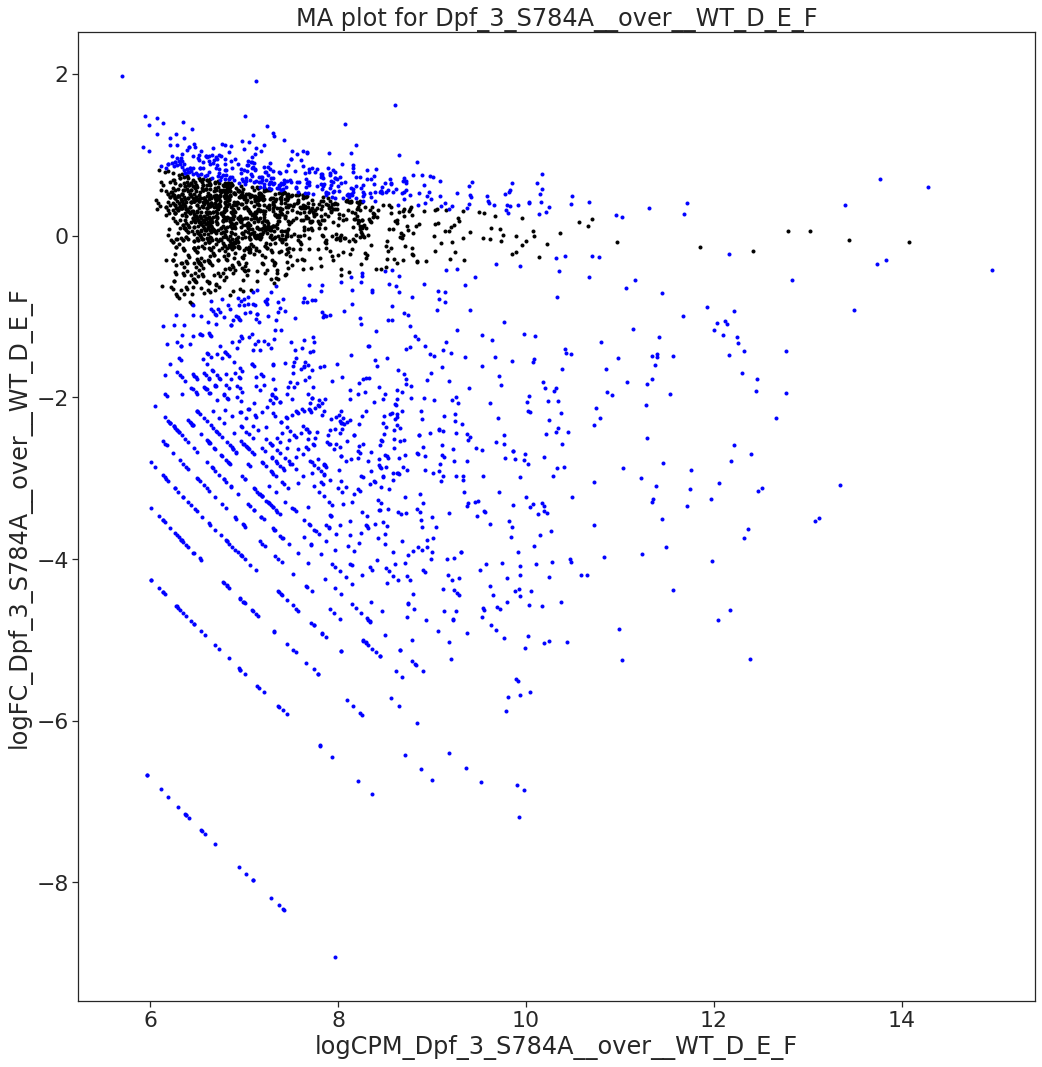

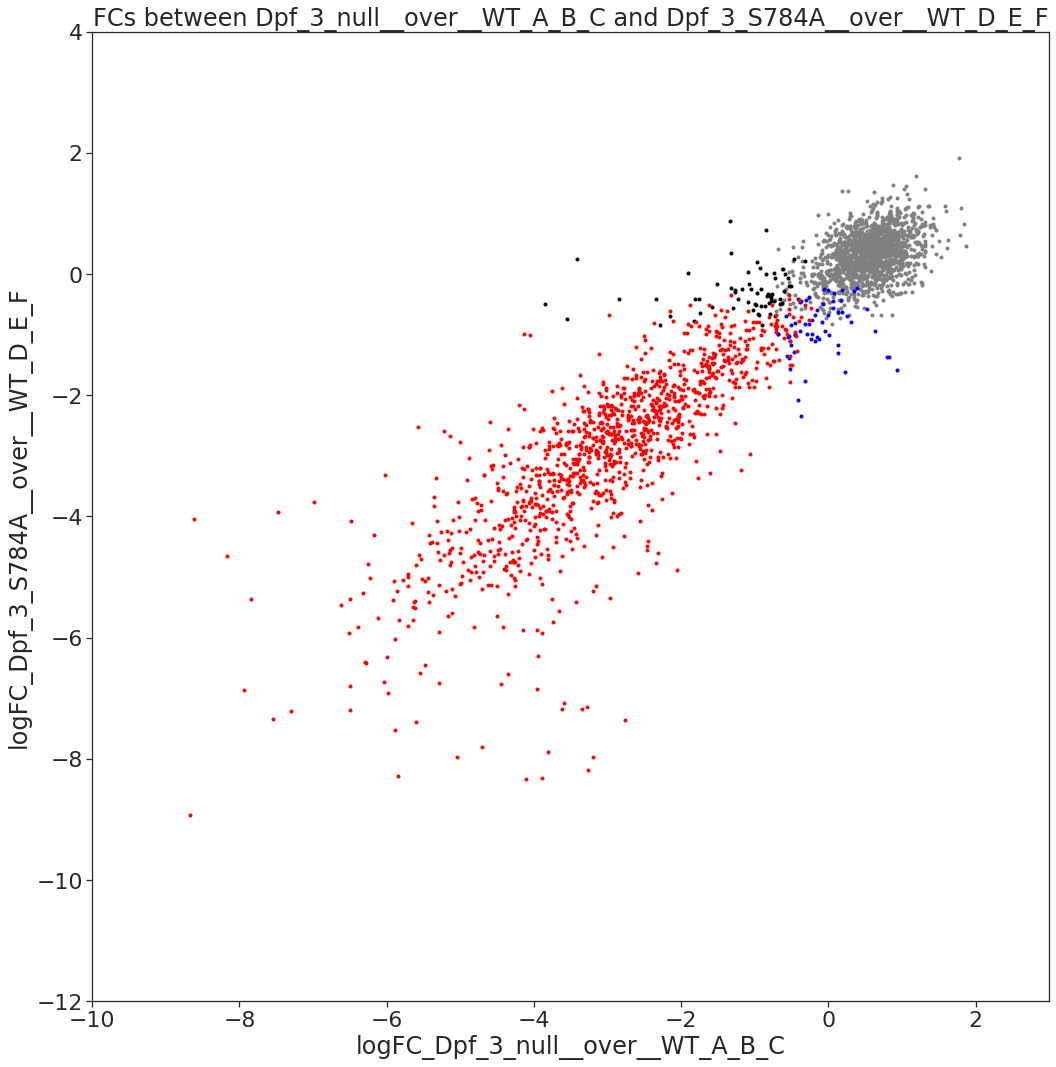

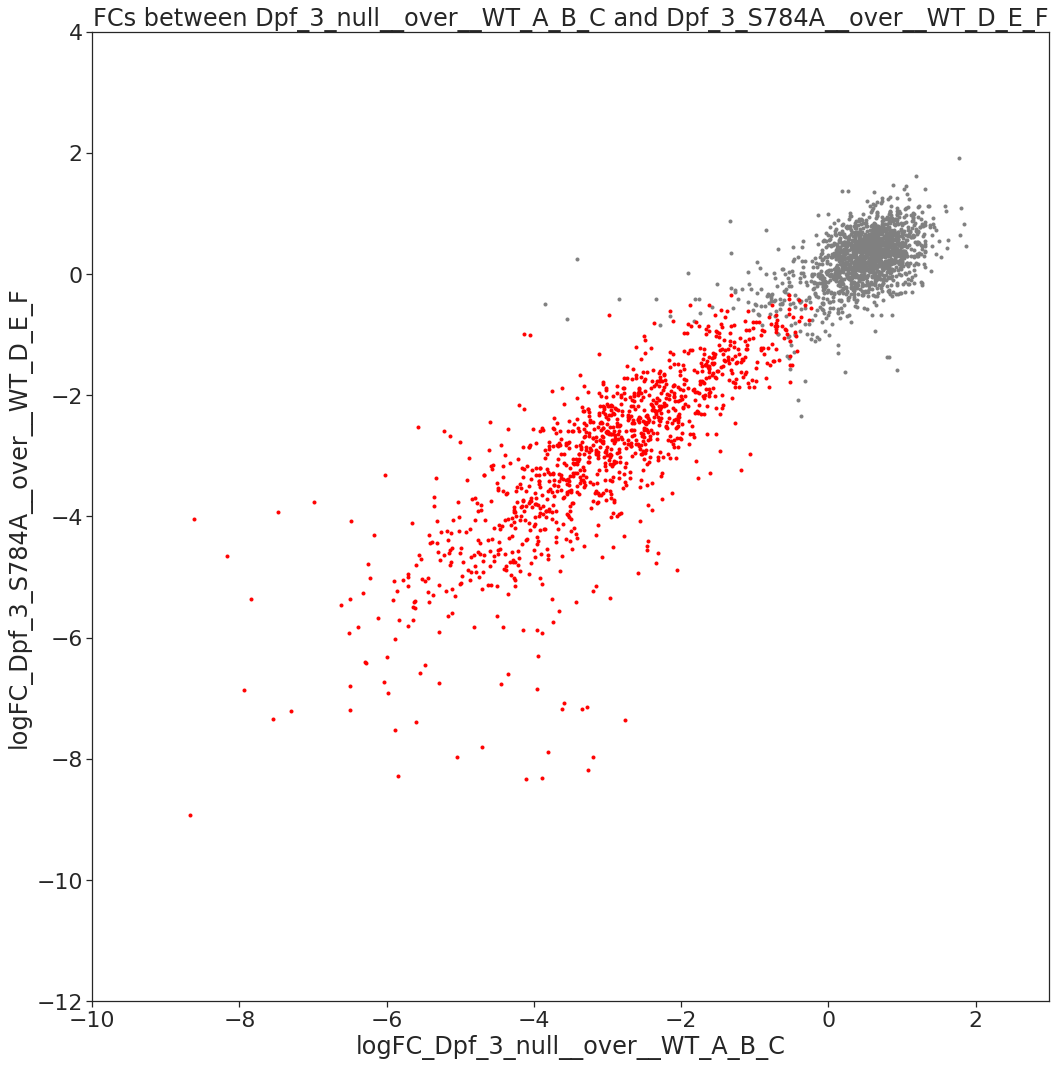

In [14]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=False)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

In [15]:
down_regulated_Dpf_3_null_and_Dpf_3_S784A = df_all[df_all["Significant"] == f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}<0"]["id"].to_list()

In [16]:
df_all.columns

Index(['id', 'logFC_Dpf_3_null__over__WT_A_B_C',
       'logCPM_Dpf_3_null__over__WT_A_B_C', 'LR_Dpf_3_null__over__WT_A_B_C',
       'PValue_Dpf_3_null__over__WT_A_B_C', 'FDR_Dpf_3_null__over__WT_A_B_C',
       'taxonomy_id_Dpf_3_null__over__WT_A_B_C',
       'gene_name_Dpf_3_null__over__WT_A_B_C',
       'sequence_Dpf_3_null__over__WT_A_B_C',
       'status_Dpf_3_null__over__WT_A_B_C',
       'gene_biotype_Dpf_3_null__over__WT_A_B_C',
       'repName_Dpf_3_null__over__WT_A_B_C',
       'repClass_Dpf_3_null__over__WT_A_B_C',
       'repFamily_Dpf_3_null__over__WT_A_B_C',
       'Significant_Dpf_3_null__over__WT_A_B_C',
       'logFC_Dpf_3_S784A__over__WT_D_E_F',
       'logCPM_Dpf_3_S784A__over__WT_D_E_F', 'LR_Dpf_3_S784A__over__WT_D_E_F',
       'PValue_Dpf_3_S784A__over__WT_D_E_F', 'FDR_Dpf_3_S784A__over__WT_D_E_F',
       'taxonomy_id_Dpf_3_S784A__over__WT_D_E_F',
       'gene_name_Dpf_3_S784A__over__WT_D_E_F',
       'sequence_Dpf_3_S784A__over__WT_D_E_F',
       'status_Dpf_3_S784

In [17]:
df_all[[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT_A_B_C  \
logFC_Dpf_3_null__over__WT_A_B_C   1.000000                           
logFC_Dpf_3_S784A__over__WT_D_E_F  0.935864                           

                                   logFC_Dpf_3_S784A__over__WT_D_E_F  
logFC_Dpf_3_null__over__WT_A_B_C   0.935864                           
logFC_Dpf_3_S784A__over__WT_D_E_F  1.000000

In [18]:
df_all[df_all["Significant"] == f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"][[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT_A_B_C  \
logFC_Dpf_3_null__over__WT_A_B_C   1.000000                           
logFC_Dpf_3_S784A__over__WT_D_E_F  0.795855                           

                                   logFC_Dpf_3_S784A__over__WT_D_E_F  
logFC_Dpf_3_null__over__WT_A_B_C   0.795855                           
logFC_Dpf_3_S784A__over__WT_D_E_F  1.000000

## dpf-3 null over WT (A,B,C) vs mut-2 over WT (D,E,F)

In [19]:
df_1_path = small_rna__WT_A_B_C__Dpf_3_null_path
df_1_name = small_rna__WT_A_B_C__Dpf_3_null_name

df_2_path = small_rna__WT_D_E_F__mut_2_path
df_2_name = small_rna__WT_D_E_F__mut_2_name

********************************************************************************
                                                                                                                                        Significant
FDR_Dpf_3_null__over__WT_A_B_C<0.05\nlogFC_Dpf_3_null__over__WT_A_B_C<0\nFDR_mut_2__over__WT_D_E_F<0.05\nlogFC_mut_2__over__WT_D_E_F<0  1165       
No                                                                                                                                      1156       
FDR_mut_2__over__WT_D_E_F<0.05\nlogFC_mut_2__over__WT_D_E_F<0                                                                           243        
FDR_Dpf_3_null__over__WT_A_B_C<0.05\nlogFC_Dpf_3_null__over__WT_A_B_C<0                                                                 8          
********************************************************************************
                                                                                                  

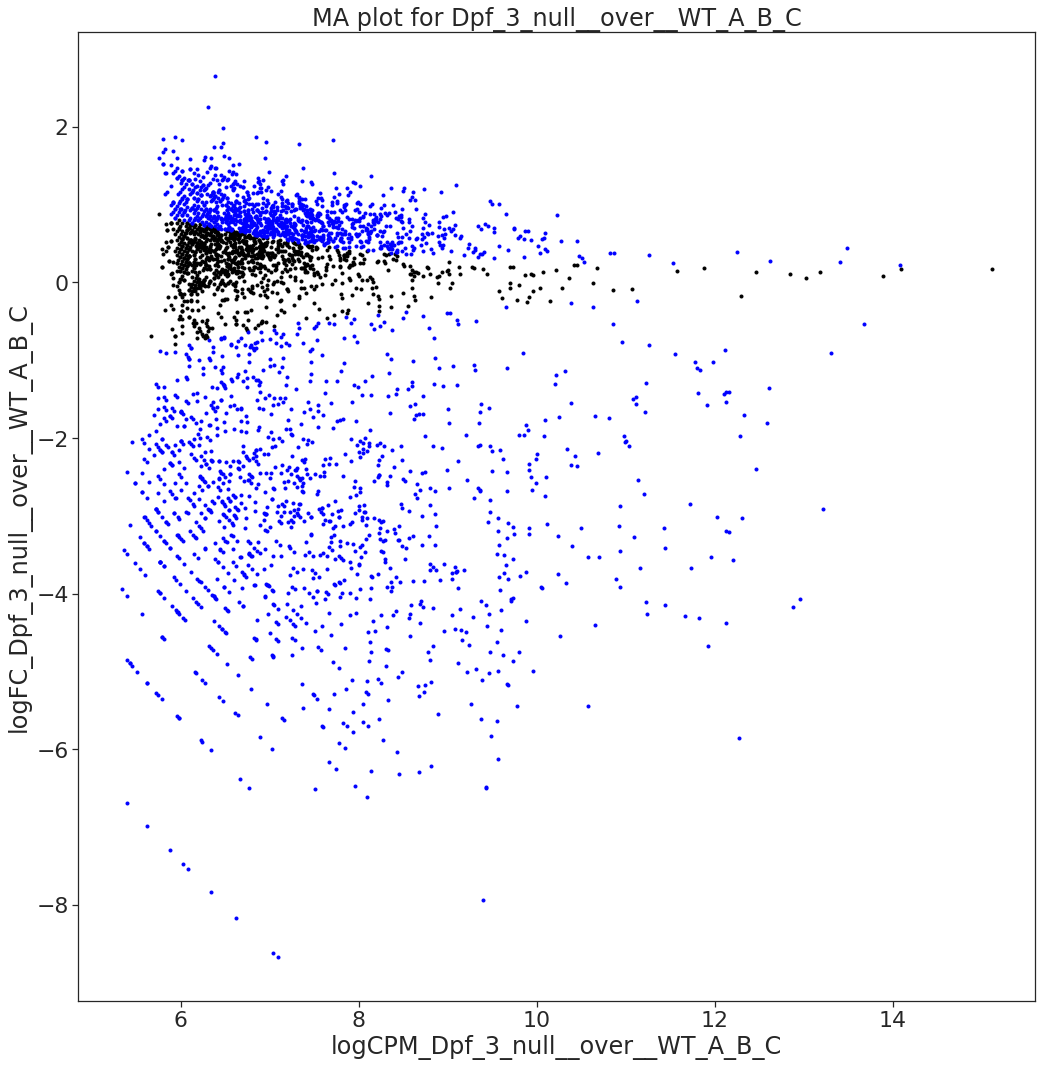

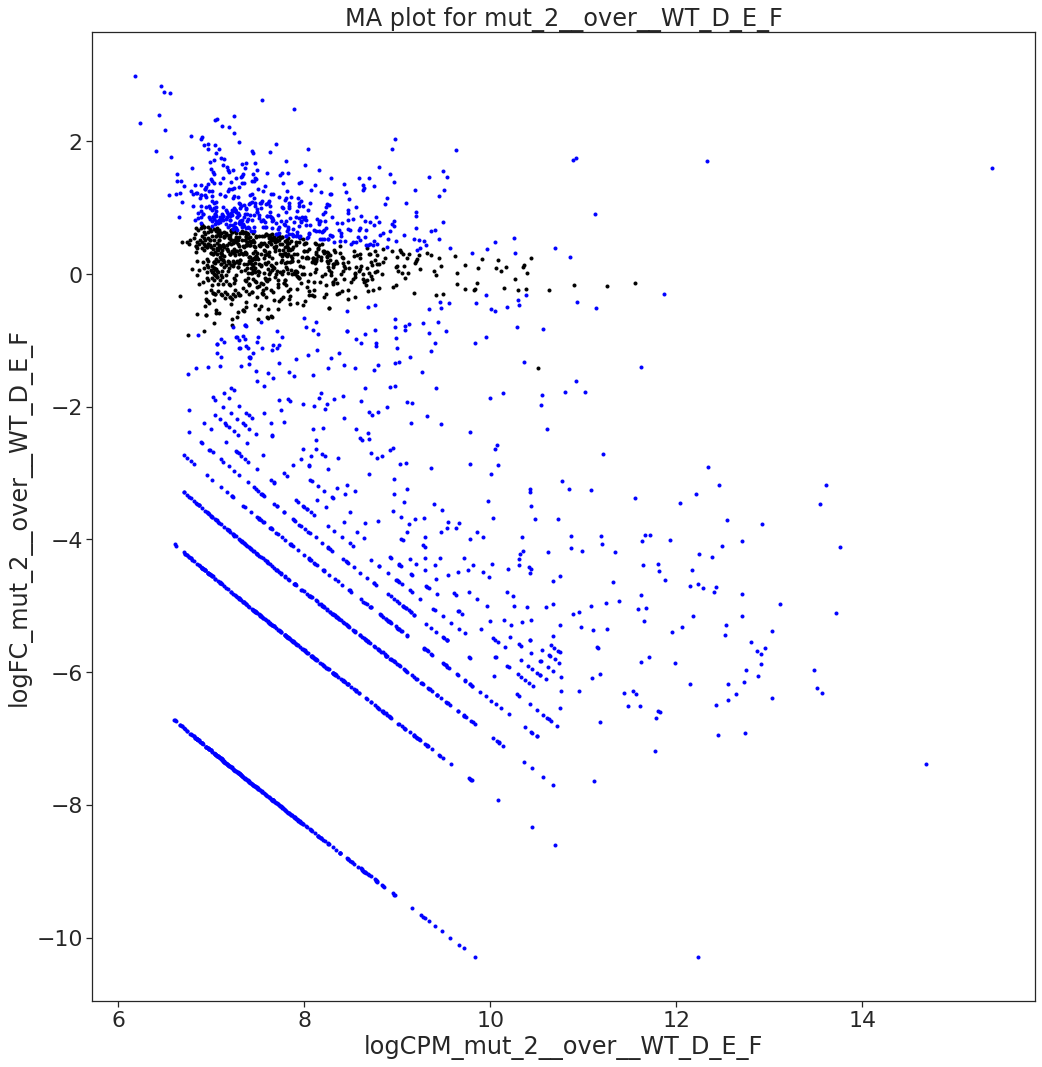

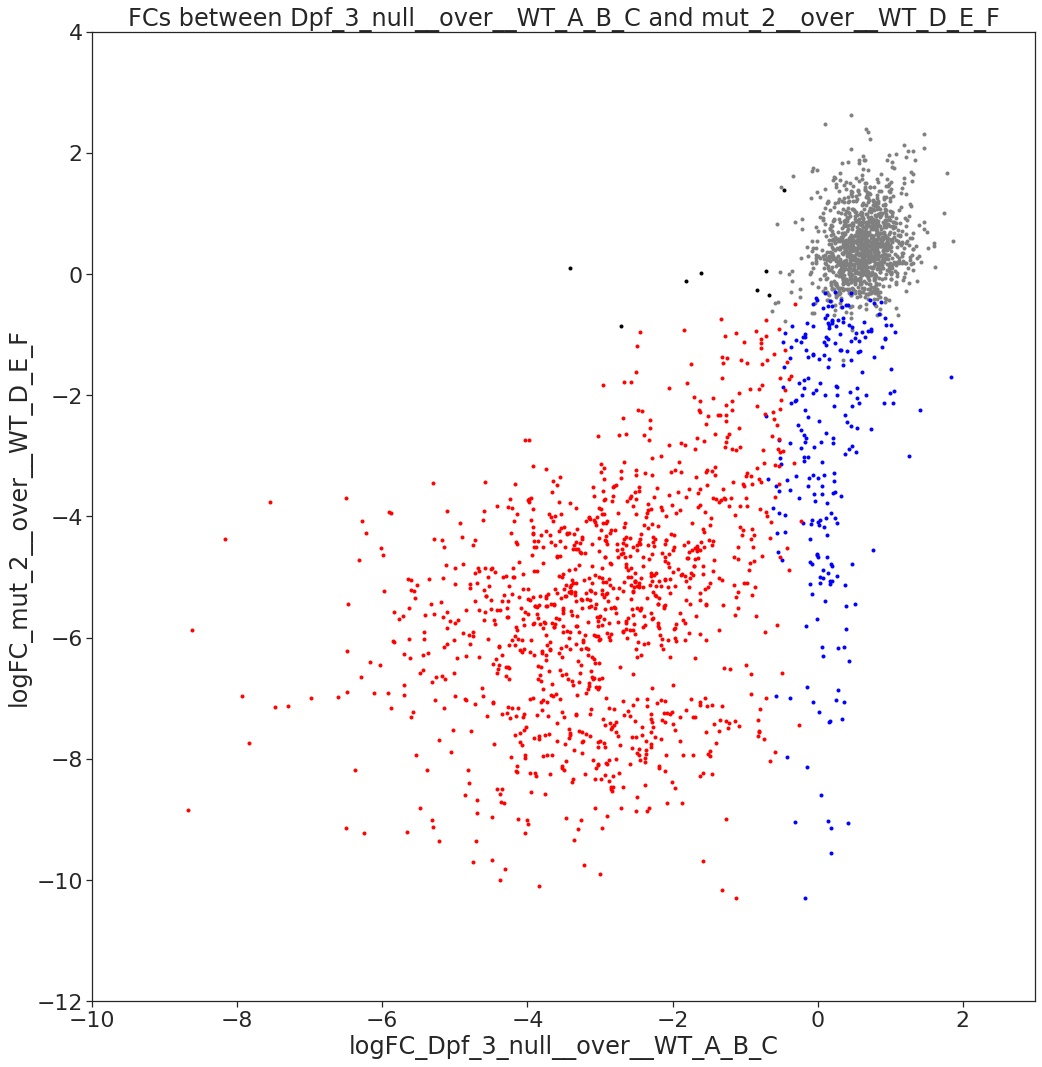

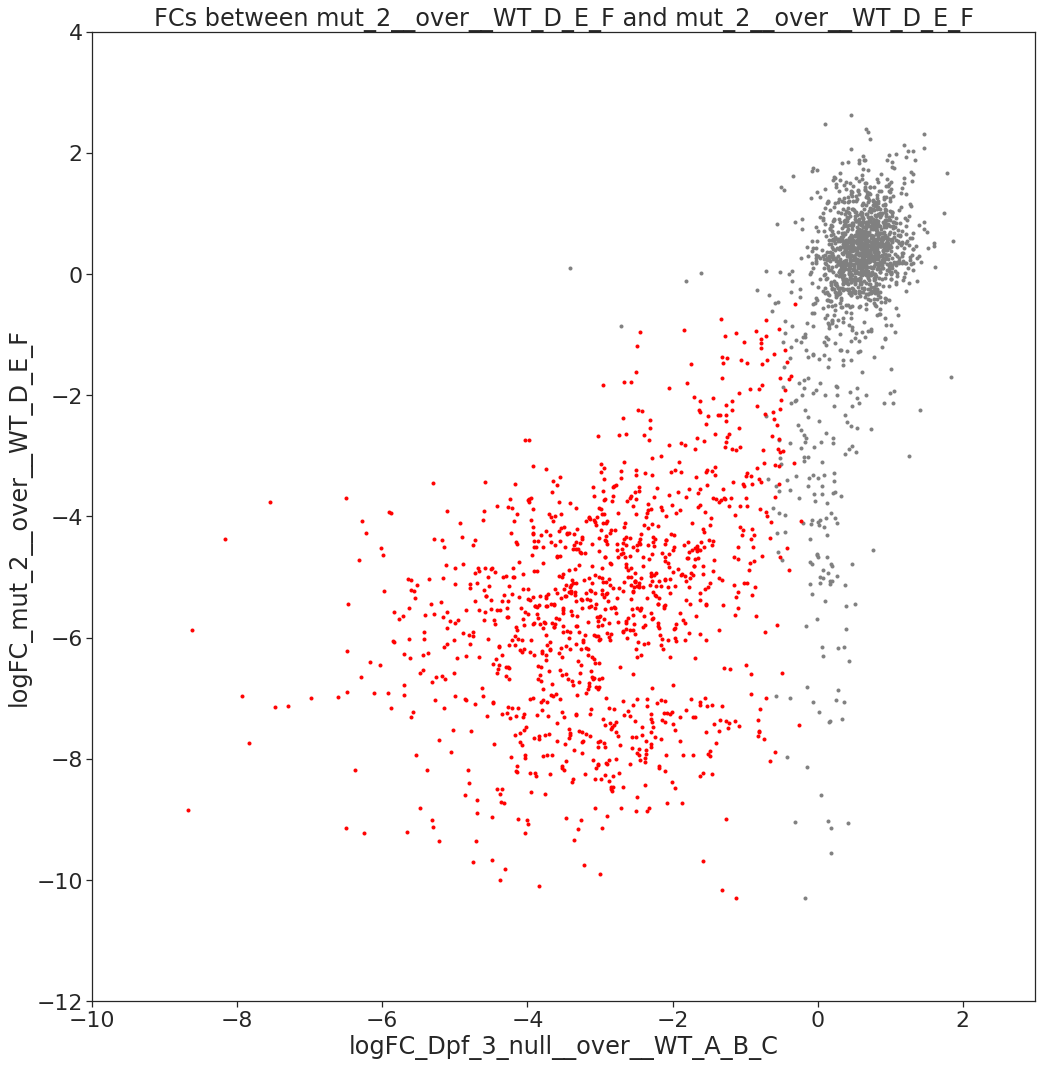

In [20]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=False)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["grey", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_2_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

In [21]:
df_all.columns

Index(['id', 'logFC_Dpf_3_null__over__WT_A_B_C',
       'logCPM_Dpf_3_null__over__WT_A_B_C', 'LR_Dpf_3_null__over__WT_A_B_C',
       'PValue_Dpf_3_null__over__WT_A_B_C', 'FDR_Dpf_3_null__over__WT_A_B_C',
       'taxonomy_id_Dpf_3_null__over__WT_A_B_C',
       'gene_name_Dpf_3_null__over__WT_A_B_C',
       'sequence_Dpf_3_null__over__WT_A_B_C',
       'status_Dpf_3_null__over__WT_A_B_C',
       'gene_biotype_Dpf_3_null__over__WT_A_B_C',
       'repName_Dpf_3_null__over__WT_A_B_C',
       'repClass_Dpf_3_null__over__WT_A_B_C',
       'repFamily_Dpf_3_null__over__WT_A_B_C',
       'Significant_Dpf_3_null__over__WT_A_B_C', 'logFC_mut_2__over__WT_D_E_F',
       'logCPM_mut_2__over__WT_D_E_F', 'LR_mut_2__over__WT_D_E_F',
       'PValue_mut_2__over__WT_D_E_F', 'FDR_mut_2__over__WT_D_E_F',
       'taxonomy_id_mut_2__over__WT_D_E_F', 'gene_name_mut_2__over__WT_D_E_F',
       'sequence_mut_2__over__WT_D_E_F', 'status_mut_2__over__WT_D_E_F',
       'gene_biotype_mut_2__over__WT_D_E_F', 'repName_m

In [22]:
df_all[[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT_A_B_C  \
logFC_Dpf_3_null__over__WT_A_B_C  1.000000                           
logFC_mut_2__over__WT_D_E_F       0.819375                           

                                  logFC_mut_2__over__WT_D_E_F  
logFC_Dpf_3_null__over__WT_A_B_C  0.819375                     
logFC_mut_2__over__WT_D_E_F       1.000000

In [23]:
df_all[df_all["Significant"] == f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"][[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT_A_B_C  \
logFC_Dpf_3_null__over__WT_A_B_C  1.000000                           
logFC_mut_2__over__WT_D_E_F       0.346839                           

                                  logFC_mut_2__over__WT_D_E_F  
logFC_Dpf_3_null__over__WT_A_B_C  0.346839                     
logFC_mut_2__over__WT_D_E_F       1.000000

## dpf-3 null over WT (A,B,C) vs mut-2 over WT (D,E,F) (MARK GENES that are corr_regulated_Dpf_3_null_and_Dpf_3_S784A)

In [24]:
df_1_path = small_rna__WT_A_B_C__Dpf_3_null_path
df_1_name = small_rna__WT_A_B_C__Dpf_3_null_name

df_2_path = small_rna__WT_D_E_F__mut_2_path
df_2_name = small_rna__WT_D_E_F__mut_2_name

    Significant
No  2572       


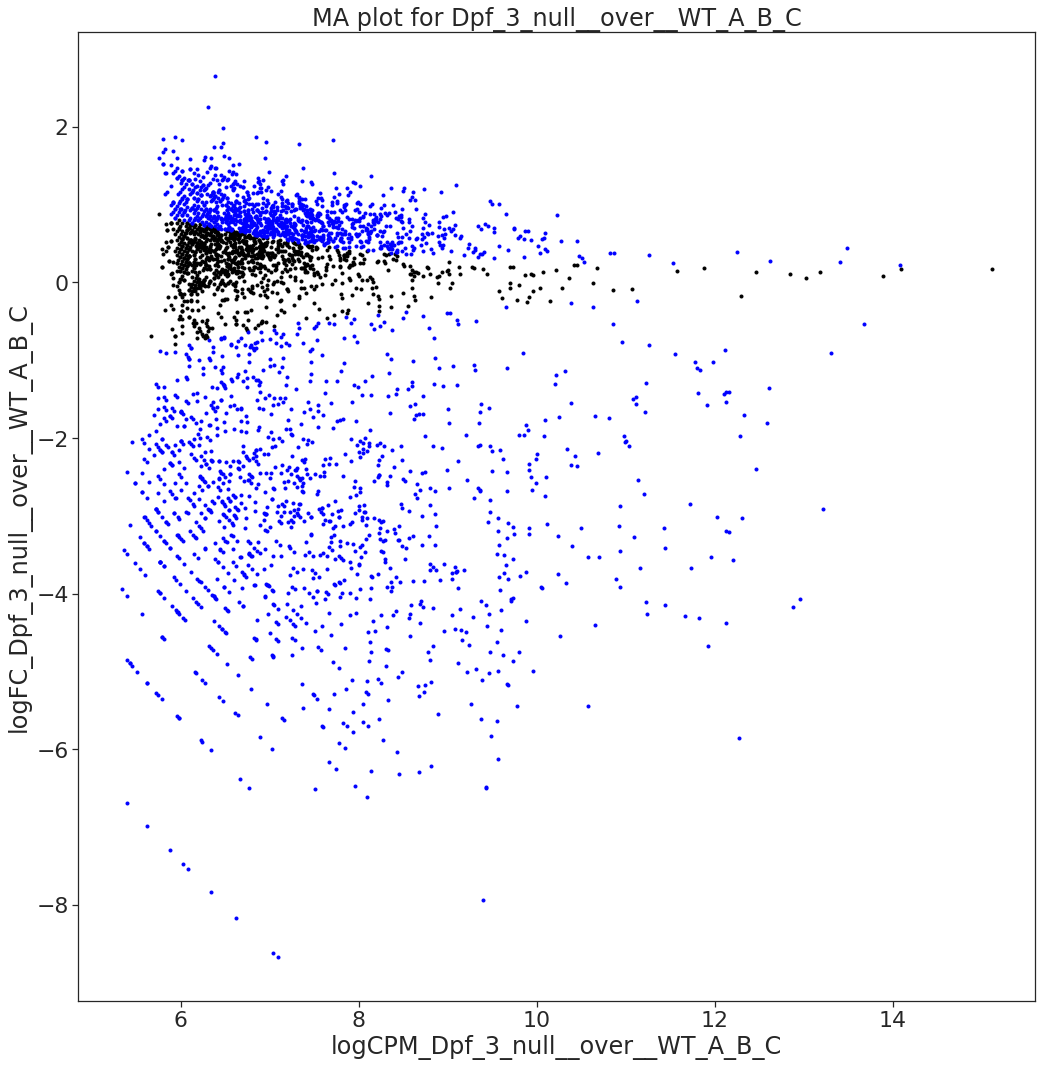

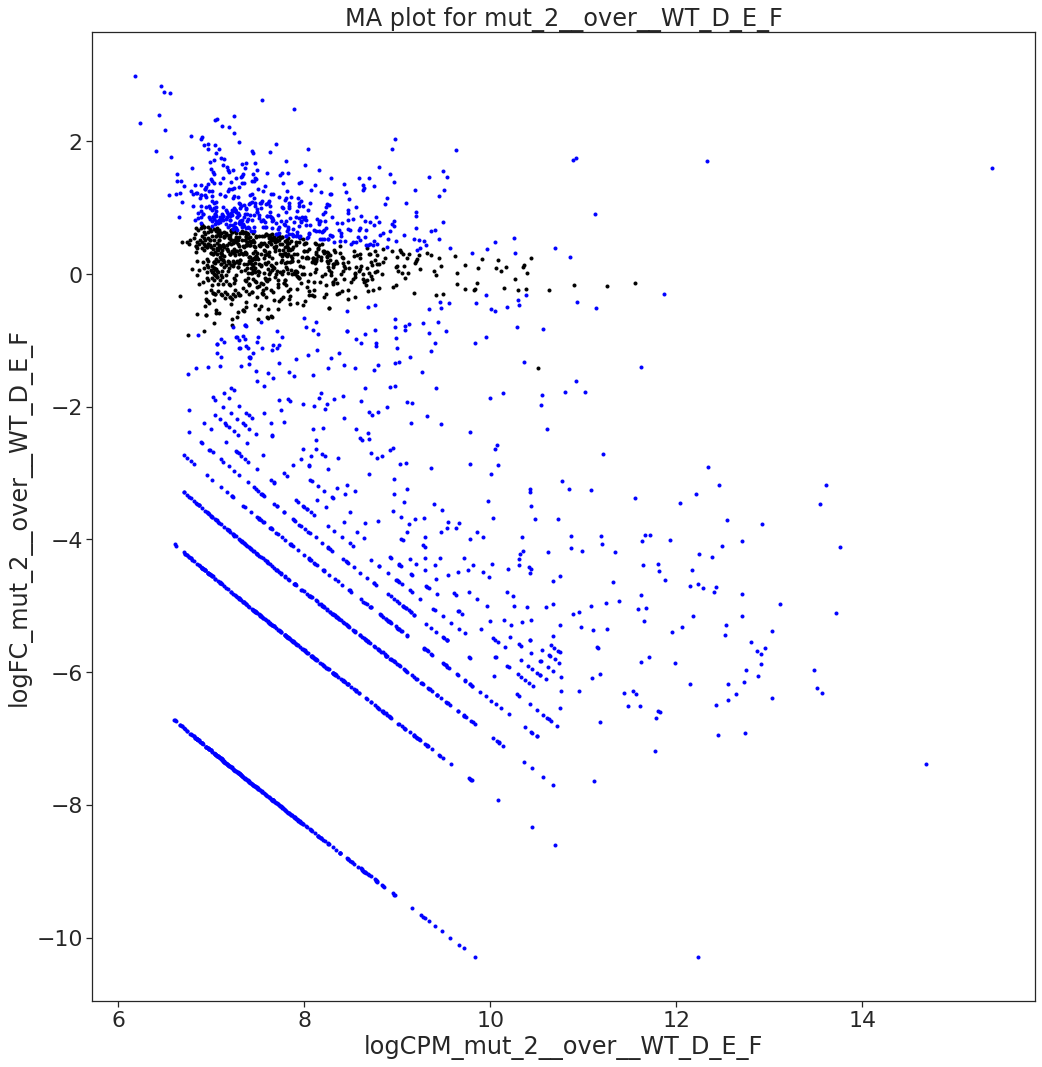

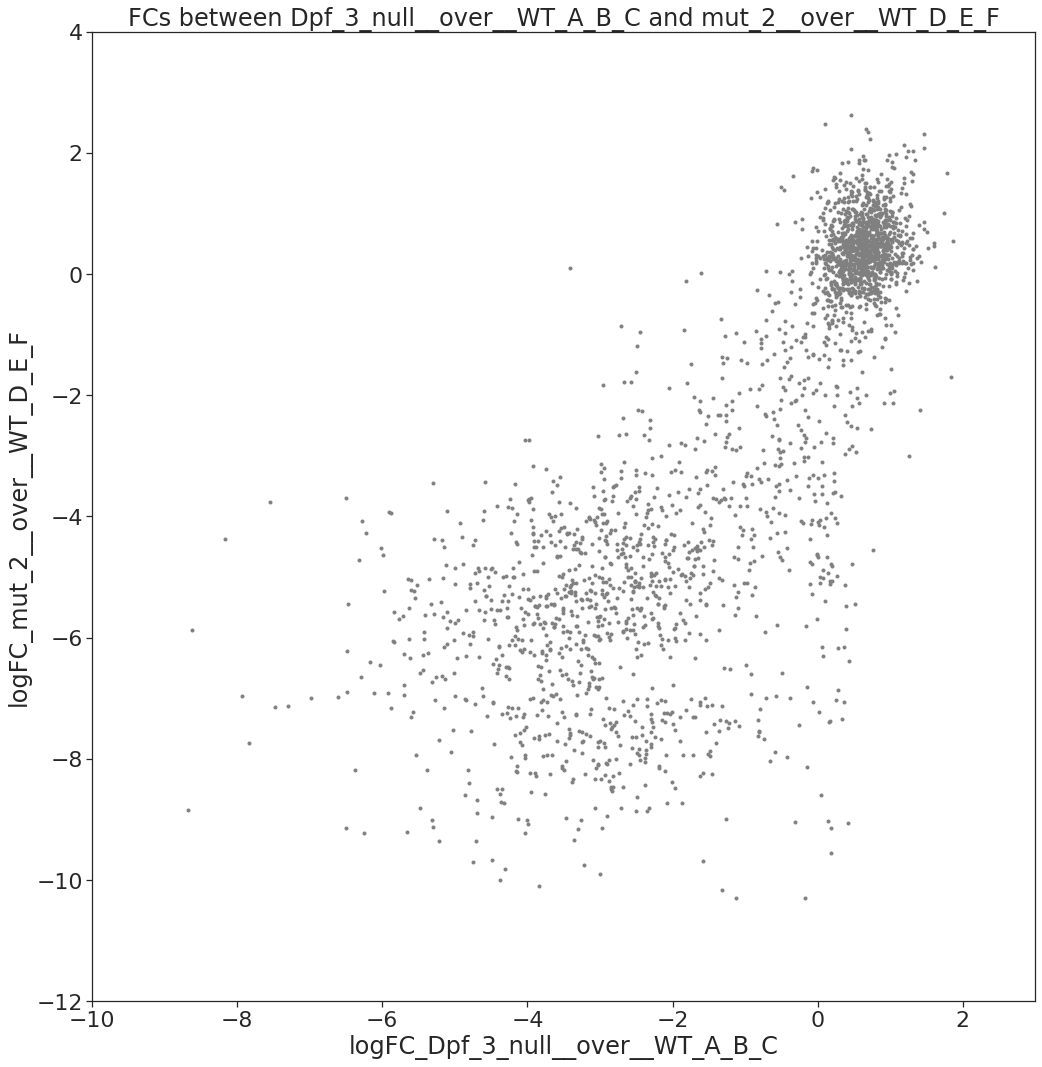

In [25]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)


df_all["Significant"] = "No"
df_all.loc[df_all["id"].isin(down_regulated_Dpf_3_null_and_Dpf_3_S784A), "Significant"] = "down in Dpf_3_null_and_Dpf_3_S784A"

print(pd.DataFrame(df_all["Significant"].value_counts()))


plot_FC_correlation_mark_genes(df_all, df_1_name, df_2_name, "Significant", ["No", "down in Dpf_3_null_and_Dpf_3_S784A"])
#                                                                               f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"])

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))
# print("*"*80)

In [26]:
df_all[[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT_A_B_C  \
logFC_Dpf_3_null__over__WT_A_B_C  1.000000                           
logFC_mut_2__over__WT_D_E_F       0.819375                           

                                  logFC_mut_2__over__WT_D_E_F  
logFC_Dpf_3_null__over__WT_A_B_C  0.819375                     
logFC_mut_2__over__WT_D_E_F       1.000000

## dpf-3 null over WT (A,B,C) vs mut-7 over WT (D,E,F)

In [27]:
df_1_path = small_rna__WT_A_B_C__Dpf_3_null_path
df_1_name = small_rna__WT_A_B_C__Dpf_3_null_name

df_2_path = small_rna__WT_D_E_F__mut_7_path
df_2_name = small_rna__WT_D_E_F__mut_7_name

********************************************************************************
                                                                                                                                        Significant
No                                                                                                                                      1558       
FDR_Dpf_3_null__over__WT_A_B_C<0.05\nlogFC_Dpf_3_null__over__WT_A_B_C<0\nFDR_mut_7__over__WT_D_E_F<0.05\nlogFC_mut_7__over__WT_D_E_F<0  1265       
FDR_mut_7__over__WT_D_E_F<0.05\nlogFC_mut_7__over__WT_D_E_F<0                                                                           333        
FDR_Dpf_3_null__over__WT_A_B_C<0.05\nlogFC_Dpf_3_null__over__WT_A_B_C<0                                                                 6          
********************************************************************************
                                                                                                  

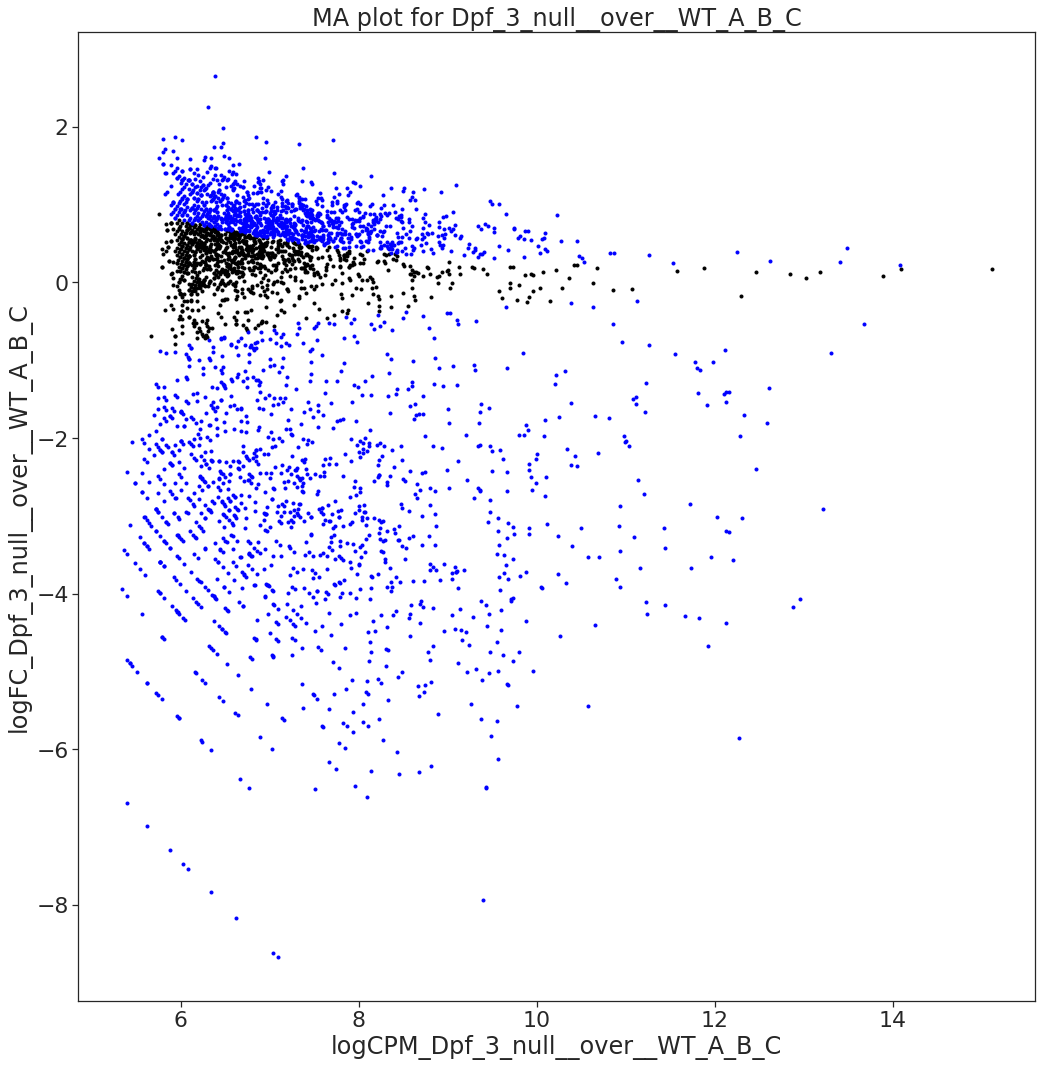

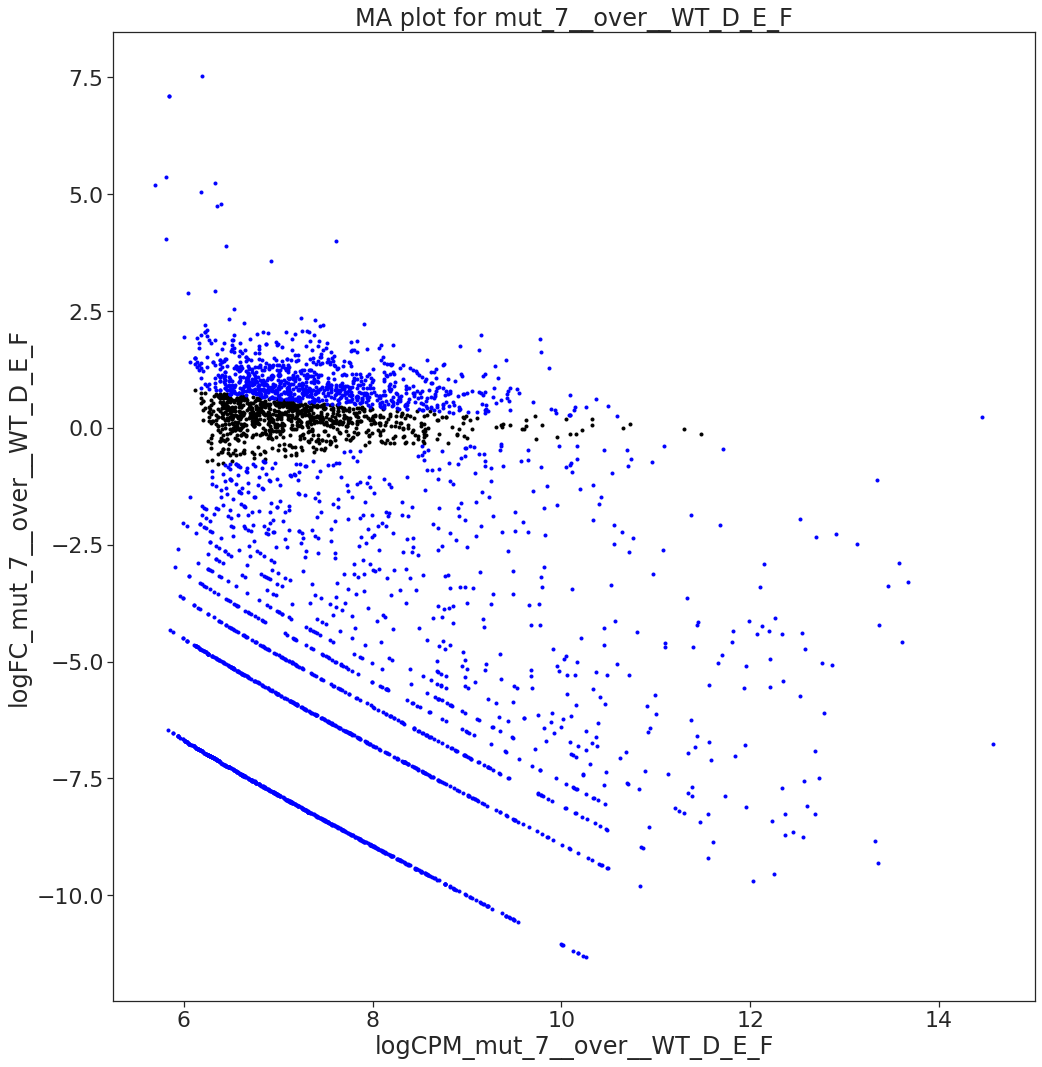

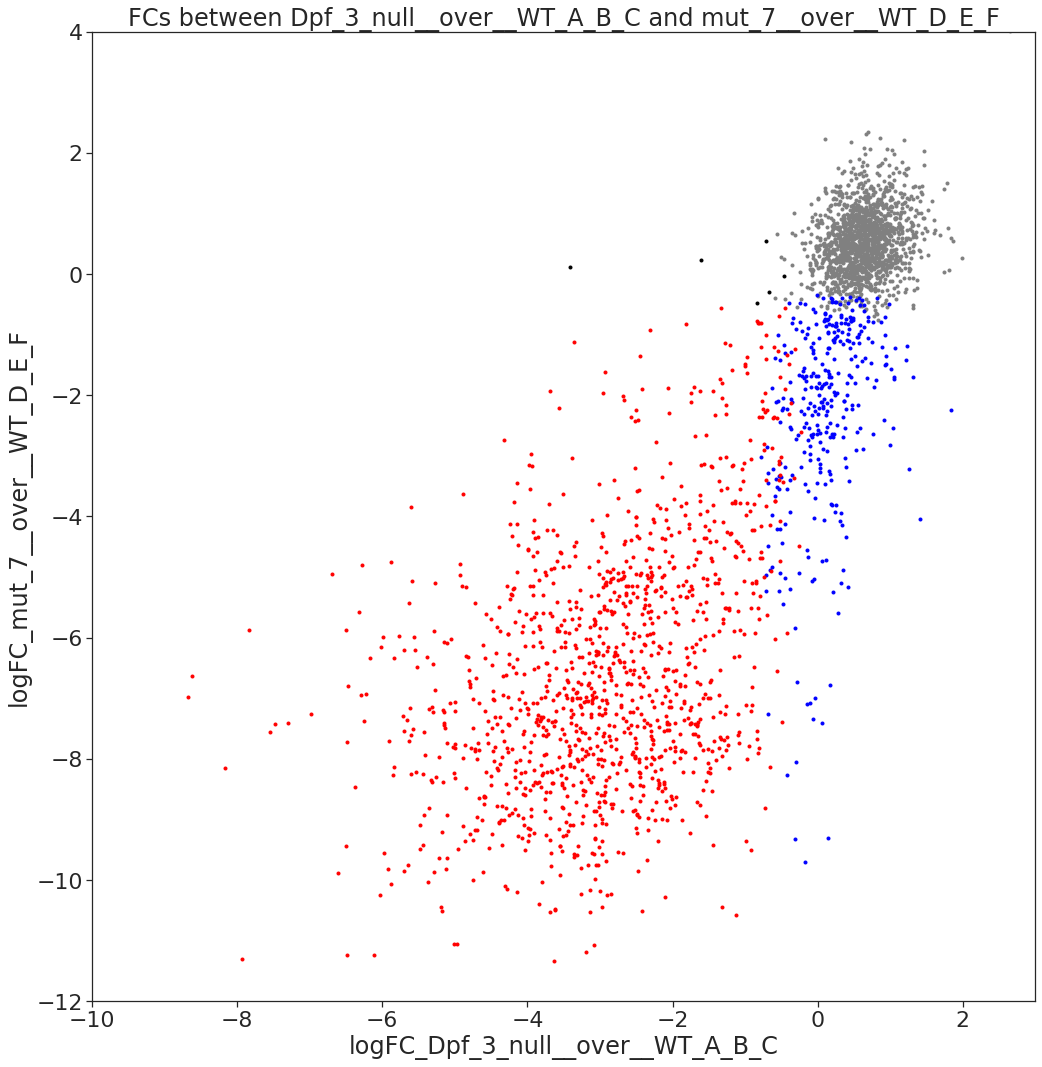

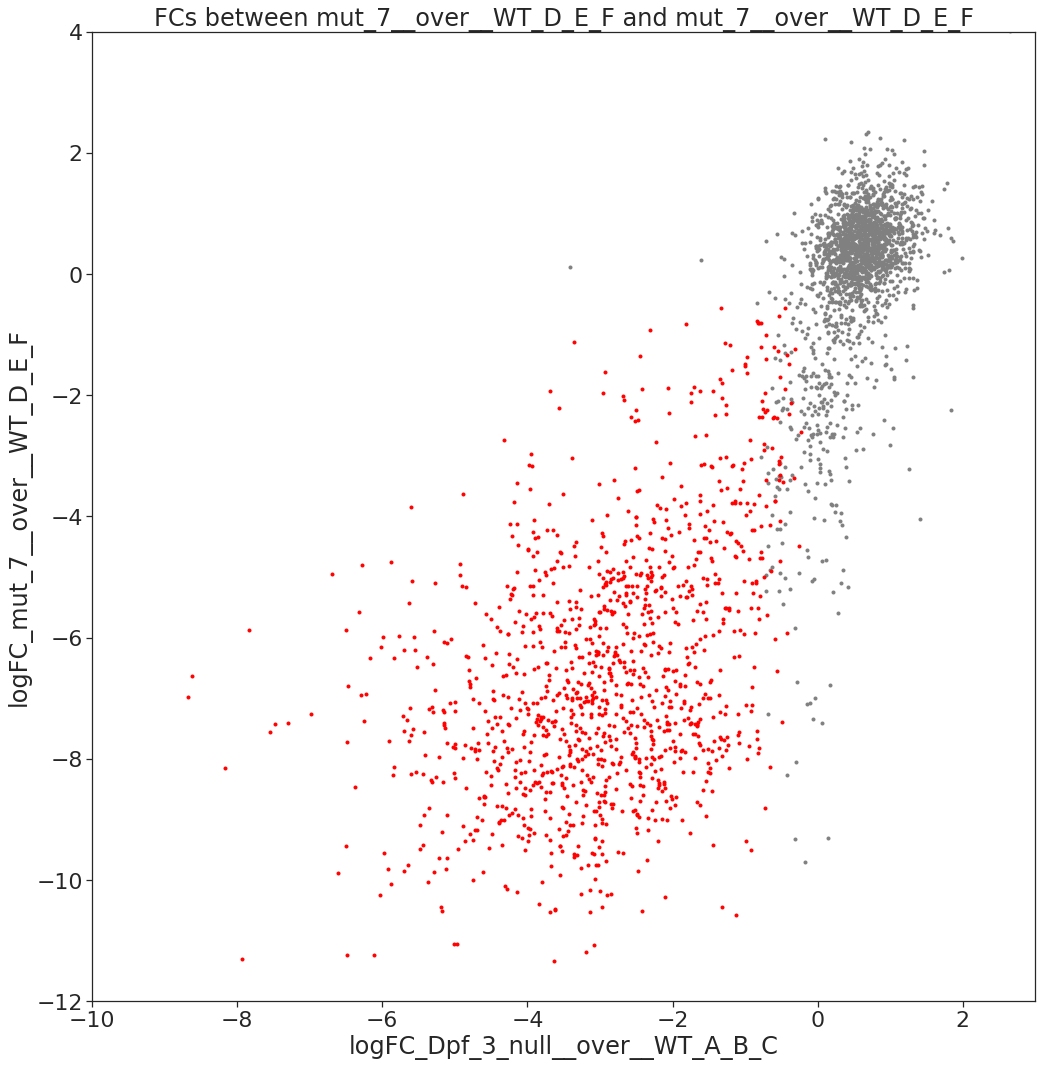

In [28]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=False)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")


df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["grey", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_2_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

In [29]:
df_all.columns

Index(['id', 'logFC_Dpf_3_null__over__WT_A_B_C',
       'logCPM_Dpf_3_null__over__WT_A_B_C', 'LR_Dpf_3_null__over__WT_A_B_C',
       'PValue_Dpf_3_null__over__WT_A_B_C', 'FDR_Dpf_3_null__over__WT_A_B_C',
       'taxonomy_id_Dpf_3_null__over__WT_A_B_C',
       'gene_name_Dpf_3_null__over__WT_A_B_C',
       'sequence_Dpf_3_null__over__WT_A_B_C',
       'status_Dpf_3_null__over__WT_A_B_C',
       'gene_biotype_Dpf_3_null__over__WT_A_B_C',
       'repName_Dpf_3_null__over__WT_A_B_C',
       'repClass_Dpf_3_null__over__WT_A_B_C',
       'repFamily_Dpf_3_null__over__WT_A_B_C',
       'Significant_Dpf_3_null__over__WT_A_B_C', 'logFC_mut_7__over__WT_D_E_F',
       'logCPM_mut_7__over__WT_D_E_F', 'LR_mut_7__over__WT_D_E_F',
       'PValue_mut_7__over__WT_D_E_F', 'FDR_mut_7__over__WT_D_E_F',
       'taxonomy_id_mut_7__over__WT_D_E_F', 'gene_name_mut_7__over__WT_D_E_F',
       'sequence_mut_7__over__WT_D_E_F', 'status_mut_7__over__WT_D_E_F',
       'gene_biotype_mut_7__over__WT_D_E_F', 'repName_m

In [30]:
df_all[[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT_A_B_C  \
logFC_Dpf_3_null__over__WT_A_B_C  1.000000                           
logFC_mut_7__over__WT_D_E_F       0.870016                           

                                  logFC_mut_7__over__WT_D_E_F  
logFC_Dpf_3_null__over__WT_A_B_C  0.870016                     
logFC_mut_7__over__WT_D_E_F       1.000000

In [31]:
df_all[df_all["Significant"] == f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"][[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT_A_B_C  \
logFC_Dpf_3_null__over__WT_A_B_C  1.000000                           
logFC_mut_7__over__WT_D_E_F       0.418361                           

                                  logFC_mut_7__over__WT_D_E_F  
logFC_Dpf_3_null__over__WT_A_B_C  0.418361                     
logFC_mut_7__over__WT_D_E_F       1.000000

## dpf-3 S784A over WT (A,B,C) vs mut-2 over WT (D,E,F)

In [32]:
df_1_path = small_rna__WT_A_B_C__Dpf_3_S784A_path
df_1_name = small_rna__WT_A_B_C__Dpf_3_S784A_name

df_2_path = small_rna__WT_D_E_F__mut_2_path
df_2_name = small_rna__WT_D_E_F__mut_2_name

********************************************************************************
                                                                                                                                          Significant
No                                                                                                                                        1076       
FDR_Dpf_3_S784A__over__WT_A_B_C<0.05\nlogFC_Dpf_3_S784A__over__WT_A_B_C<0\nFDR_mut_2__over__WT_D_E_F<0.05\nlogFC_mut_2__over__WT_D_E_F<0  1074       
FDR_mut_2__over__WT_D_E_F<0.05\nlogFC_mut_2__over__WT_D_E_F<0                                                                             288        
FDR_Dpf_3_S784A__over__WT_A_B_C<0.05\nlogFC_Dpf_3_S784A__over__WT_A_B_C<0                                                                 6          
********************************************************************************
                                                                                        

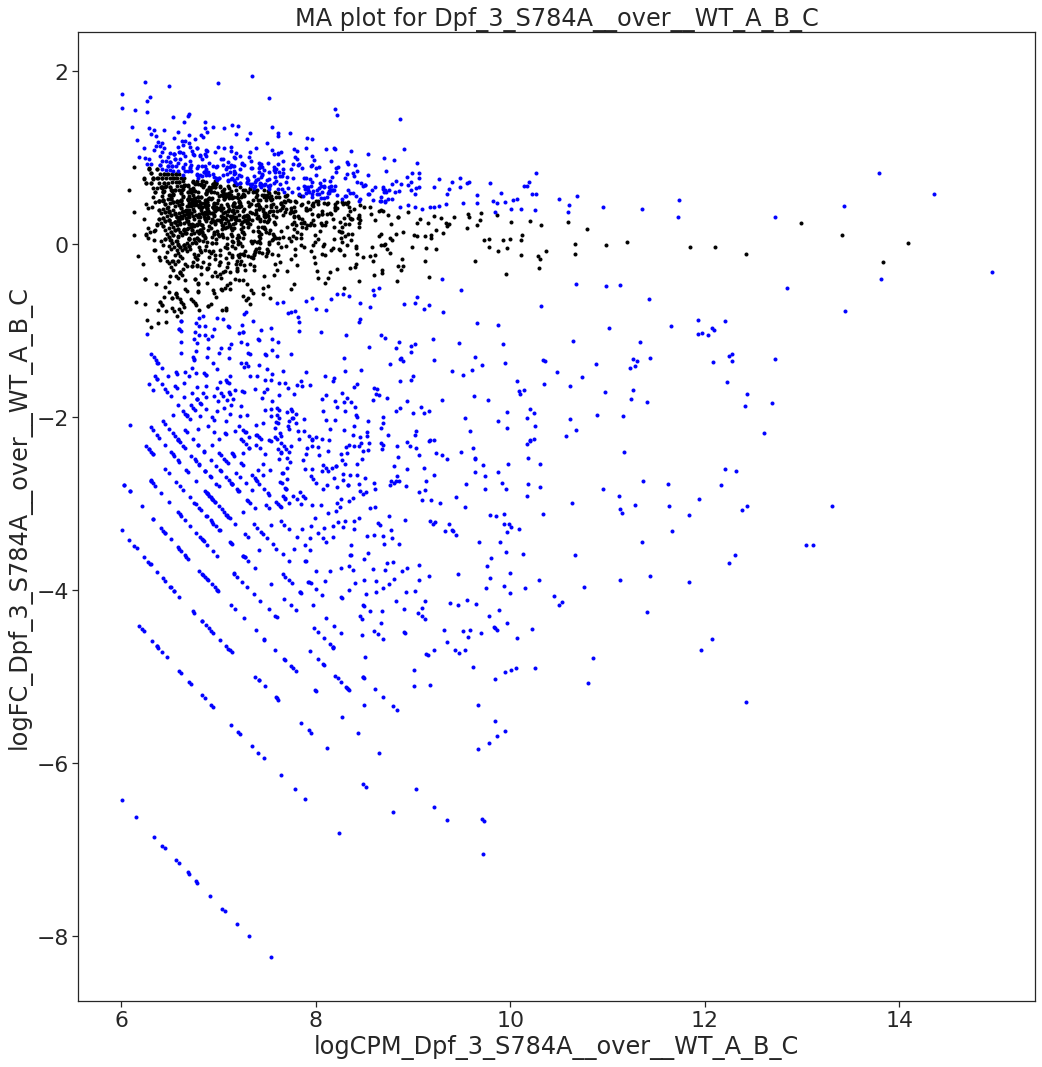

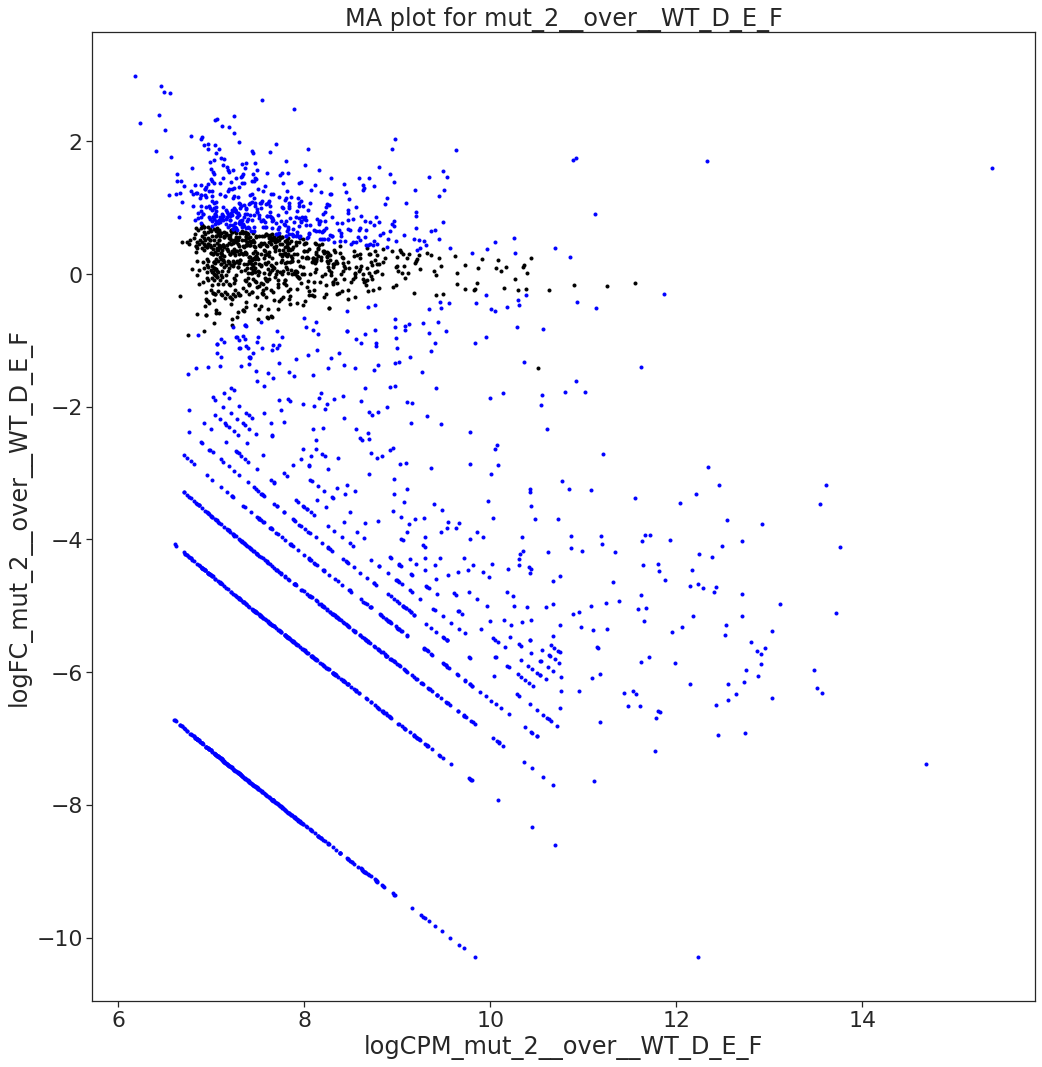

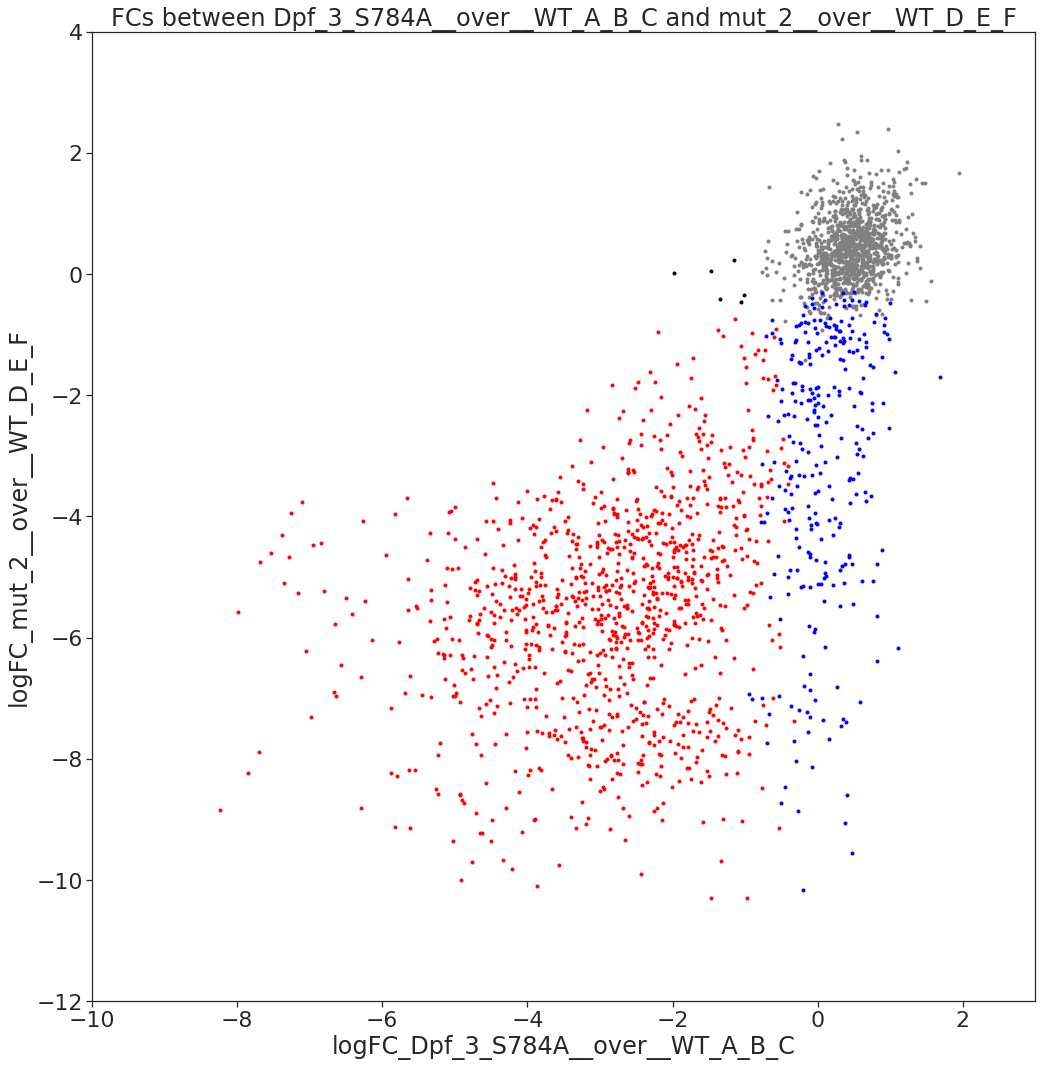

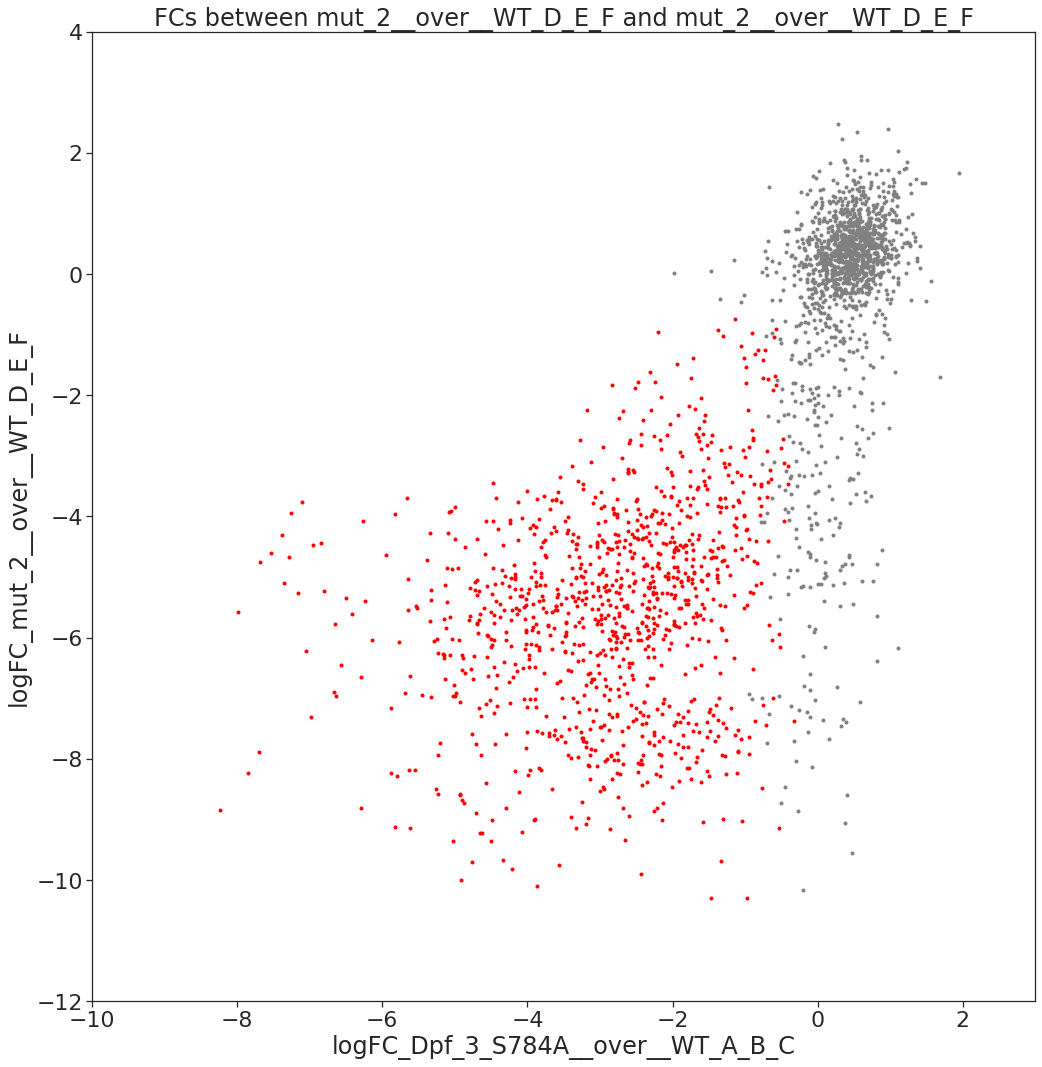

In [33]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=False)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["grey", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_2_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

In [34]:
df_all.columns

Index(['id', 'logFC_Dpf_3_S784A__over__WT_A_B_C',
       'logCPM_Dpf_3_S784A__over__WT_A_B_C', 'LR_Dpf_3_S784A__over__WT_A_B_C',
       'PValue_Dpf_3_S784A__over__WT_A_B_C', 'FDR_Dpf_3_S784A__over__WT_A_B_C',
       'taxonomy_id_Dpf_3_S784A__over__WT_A_B_C',
       'gene_name_Dpf_3_S784A__over__WT_A_B_C',
       'sequence_Dpf_3_S784A__over__WT_A_B_C',
       'status_Dpf_3_S784A__over__WT_A_B_C',
       'gene_biotype_Dpf_3_S784A__over__WT_A_B_C',
       'repName_Dpf_3_S784A__over__WT_A_B_C',
       'repClass_Dpf_3_S784A__over__WT_A_B_C',
       'repFamily_Dpf_3_S784A__over__WT_A_B_C',
       'Significant_Dpf_3_S784A__over__WT_A_B_C',
       'logFC_mut_2__over__WT_D_E_F', 'logCPM_mut_2__over__WT_D_E_F',
       'LR_mut_2__over__WT_D_E_F', 'PValue_mut_2__over__WT_D_E_F',
       'FDR_mut_2__over__WT_D_E_F', 'taxonomy_id_mut_2__over__WT_D_E_F',
       'gene_name_mut_2__over__WT_D_E_F', 'sequence_mut_2__over__WT_D_E_F',
       'status_mut_2__over__WT_D_E_F', 'gene_biotype_mut_2__over__WT_D_E_

In [35]:
df_all[[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_S784A__over__WT_A_B_C  \
logFC_Dpf_3_S784A__over__WT_A_B_C  1.000000                            
logFC_mut_2__over__WT_D_E_F        0.779869                            

                                   logFC_mut_2__over__WT_D_E_F  
logFC_Dpf_3_S784A__over__WT_A_B_C  0.779869                     
logFC_mut_2__over__WT_D_E_F        1.000000

In [36]:
df_all[df_all["Significant"] == f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"][[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_S784A__over__WT_A_B_C  \
logFC_Dpf_3_S784A__over__WT_A_B_C  1.000000                            
logFC_mut_2__over__WT_D_E_F        0.258293                            

                                   logFC_mut_2__over__WT_D_E_F  
logFC_Dpf_3_S784A__over__WT_A_B_C  0.258293                     
logFC_mut_2__over__WT_D_E_F        1.000000

## dpf-3 S784A over WT (A,B,C) vs mut-7 over WT (D,E,F)

In [37]:
df_1_path = small_rna__WT_A_B_C__Dpf_3_S784A_path
df_1_name = small_rna__WT_A_B_C__Dpf_3_S784A_name

df_2_path = small_rna__WT_D_E_F__mut_7_path
df_2_name = small_rna__WT_D_E_F__mut_7_name

********************************************************************************
                                                                                                                                          Significant
No                                                                                                                                        1223       
FDR_Dpf_3_S784A__over__WT_A_B_C<0.05\nlogFC_Dpf_3_S784A__over__WT_A_B_C<0\nFDR_mut_7__over__WT_D_E_F<0.05\nlogFC_mut_7__over__WT_D_E_F<0  1112       
FDR_mut_7__over__WT_D_E_F<0.05\nlogFC_mut_7__over__WT_D_E_F<0                                                                             361        
FDR_Dpf_3_S784A__over__WT_A_B_C<0.05\nlogFC_Dpf_3_S784A__over__WT_A_B_C<0                                                                 5          
********************************************************************************
                                                                                        

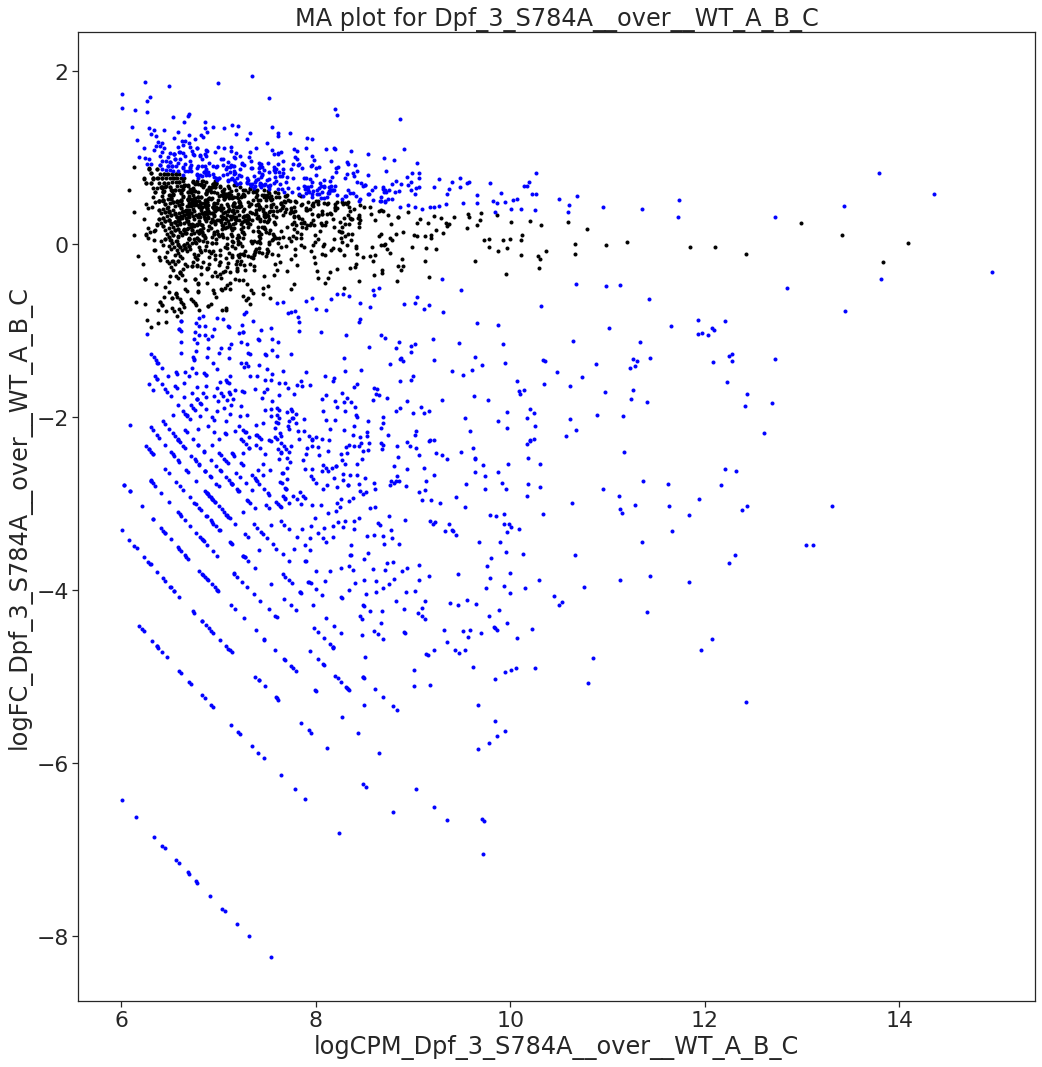

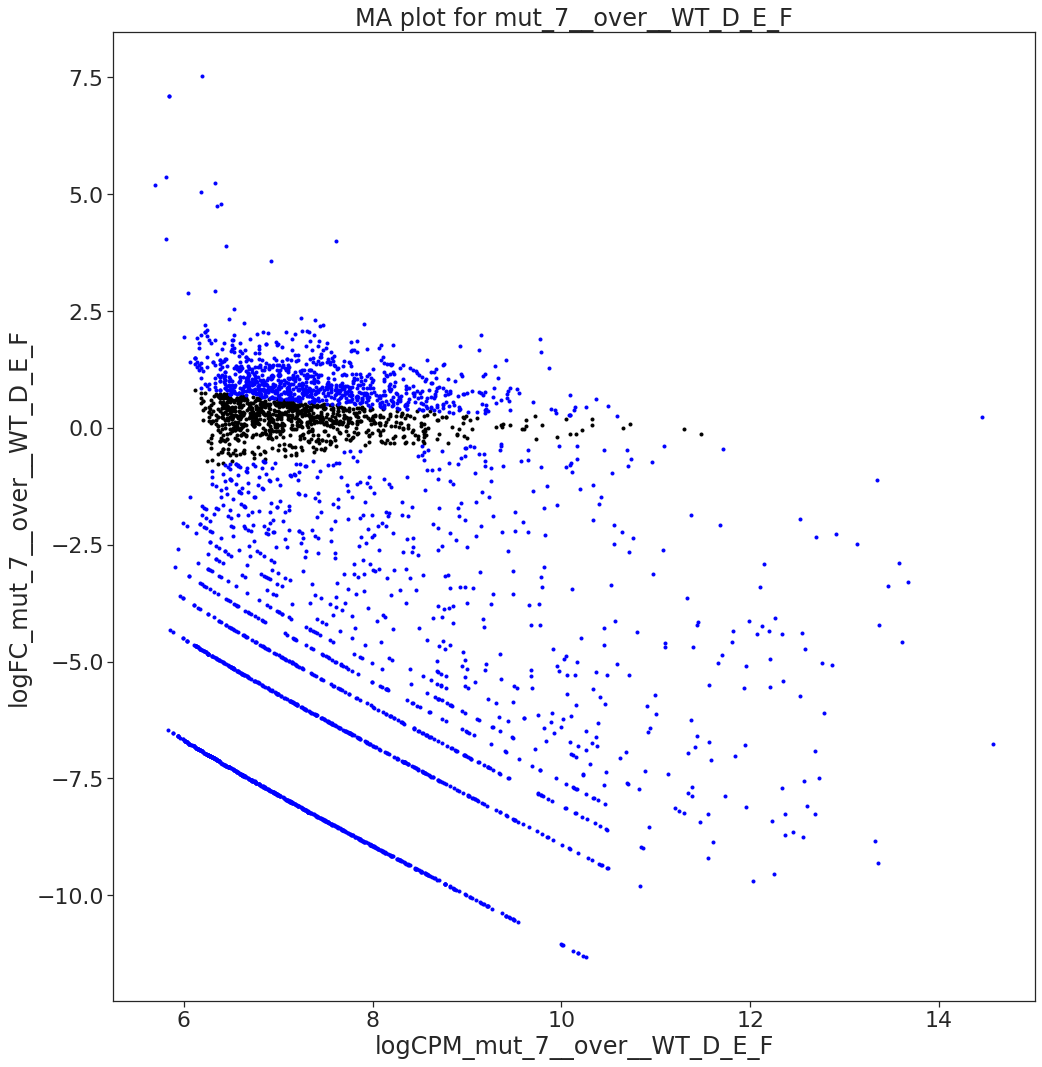

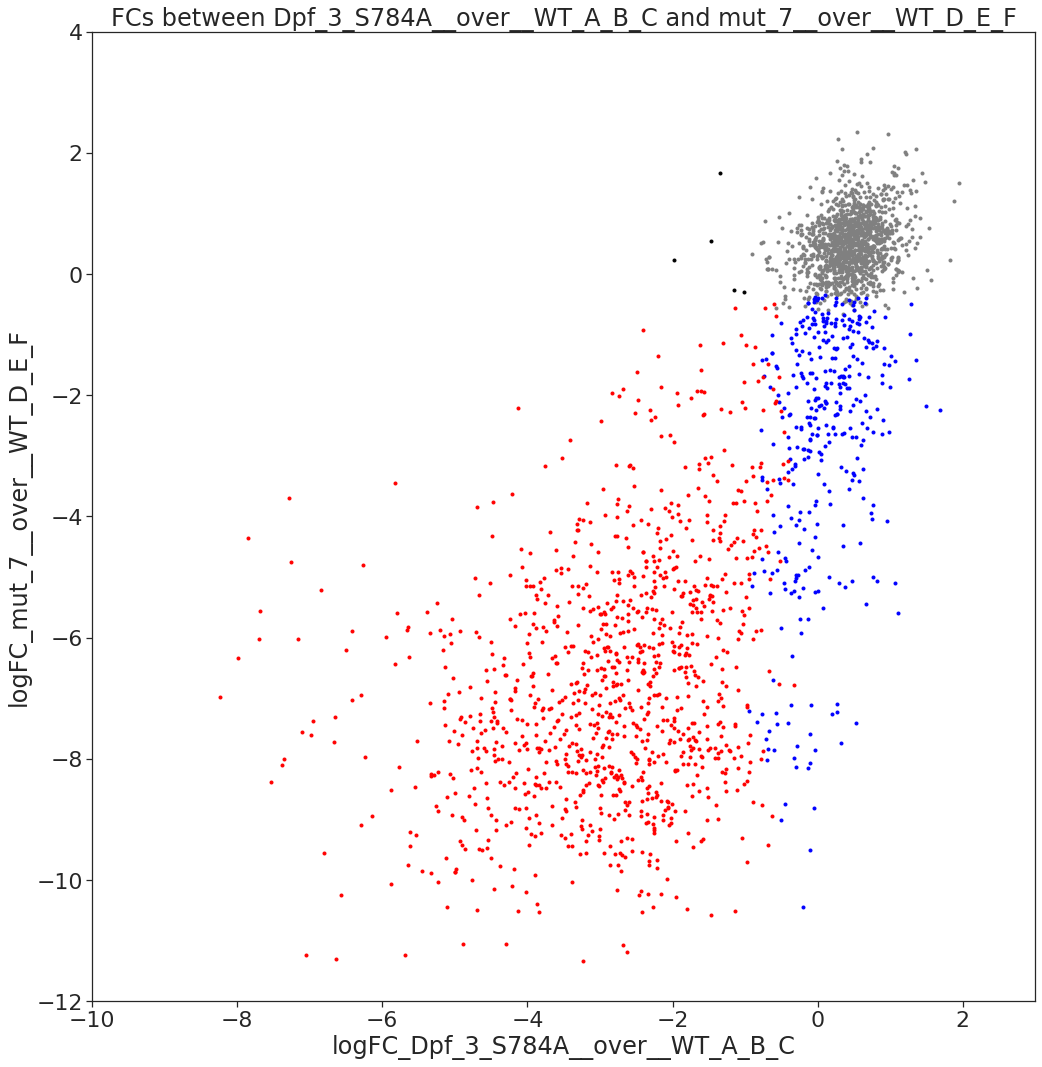

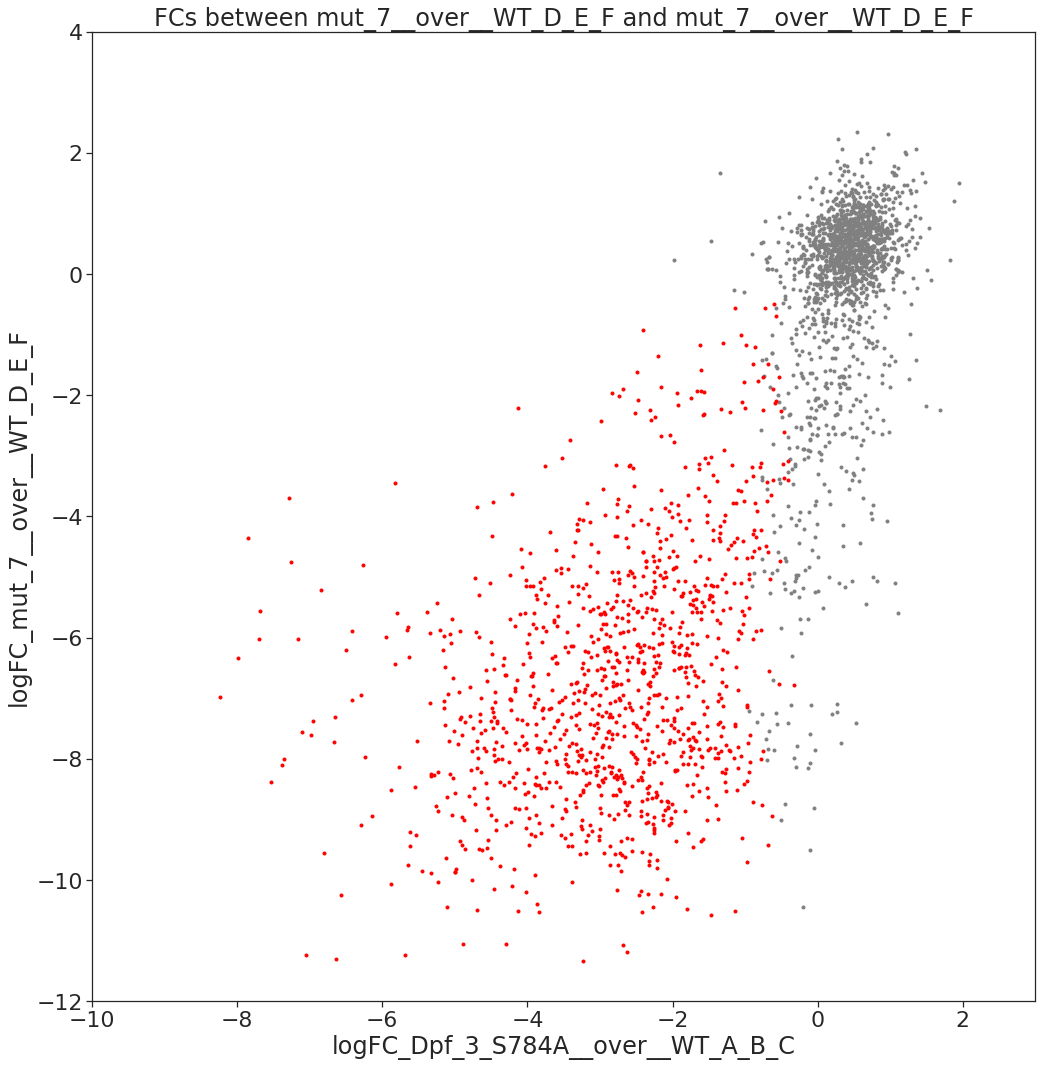

In [38]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=False)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["grey", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_2_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

In [39]:
df_all.columns

Index(['id', 'logFC_Dpf_3_S784A__over__WT_A_B_C',
       'logCPM_Dpf_3_S784A__over__WT_A_B_C', 'LR_Dpf_3_S784A__over__WT_A_B_C',
       'PValue_Dpf_3_S784A__over__WT_A_B_C', 'FDR_Dpf_3_S784A__over__WT_A_B_C',
       'taxonomy_id_Dpf_3_S784A__over__WT_A_B_C',
       'gene_name_Dpf_3_S784A__over__WT_A_B_C',
       'sequence_Dpf_3_S784A__over__WT_A_B_C',
       'status_Dpf_3_S784A__over__WT_A_B_C',
       'gene_biotype_Dpf_3_S784A__over__WT_A_B_C',
       'repName_Dpf_3_S784A__over__WT_A_B_C',
       'repClass_Dpf_3_S784A__over__WT_A_B_C',
       'repFamily_Dpf_3_S784A__over__WT_A_B_C',
       'Significant_Dpf_3_S784A__over__WT_A_B_C',
       'logFC_mut_7__over__WT_D_E_F', 'logCPM_mut_7__over__WT_D_E_F',
       'LR_mut_7__over__WT_D_E_F', 'PValue_mut_7__over__WT_D_E_F',
       'FDR_mut_7__over__WT_D_E_F', 'taxonomy_id_mut_7__over__WT_D_E_F',
       'gene_name_mut_7__over__WT_D_E_F', 'sequence_mut_7__over__WT_D_E_F',
       'status_mut_7__over__WT_D_E_F', 'gene_biotype_mut_7__over__WT_D_E_

In [40]:
df_all[[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_S784A__over__WT_A_B_C  \
logFC_Dpf_3_S784A__over__WT_A_B_C  1.000000                            
logFC_mut_7__over__WT_D_E_F        0.823959                            

                                   logFC_mut_7__over__WT_D_E_F  
logFC_Dpf_3_S784A__over__WT_A_B_C  0.823959                     
logFC_mut_7__over__WT_D_E_F        1.000000

In [41]:
df_all[df_all["Significant"] == f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"][[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_S784A__over__WT_A_B_C  \
logFC_Dpf_3_S784A__over__WT_A_B_C  1.000000                            
logFC_mut_7__over__WT_D_E_F        0.330533                            

                                   logFC_mut_7__over__WT_D_E_F  
logFC_Dpf_3_S784A__over__WT_A_B_C  0.330533                     
logFC_mut_7__over__WT_D_E_F        1.000000

## dpf-3 null over WT vs HW3134 input over WAGO-1 input

In [42]:
df_1_path = small_rna__WT__Dpf_3_null_path
df_1_name = small_rna__WT__Dpf_3_null_name

df_2_path = HW3134_INPUT__over__Input_WAGO_1_path
df_2_name = HW3134_INPUT__over__Input_WAGO_1_name

********************************************************************************
                                                                                                                                                  Significant
No                                                                                                                                                2051       
FDR_Dpf_3_null__over__WT<0.05\nlogFC_Dpf_3_null__over__WT<0\nFDR_HW3134_INPUT__over__WAGO-1_Input<0.05\nlogFC_HW3134_INPUT__over__WAGO-1_Input<0  800        
FDR_Dpf_3_null__over__WT<0.05\nlogFC_Dpf_3_null__over__WT<0                                                                                       663        
FDR_HW3134_INPUT__over__WAGO-1_Input<0.05\nlogFC_HW3134_INPUT__over__WAGO-1_Input<0                                                               118        
********************************************************************************
                                                

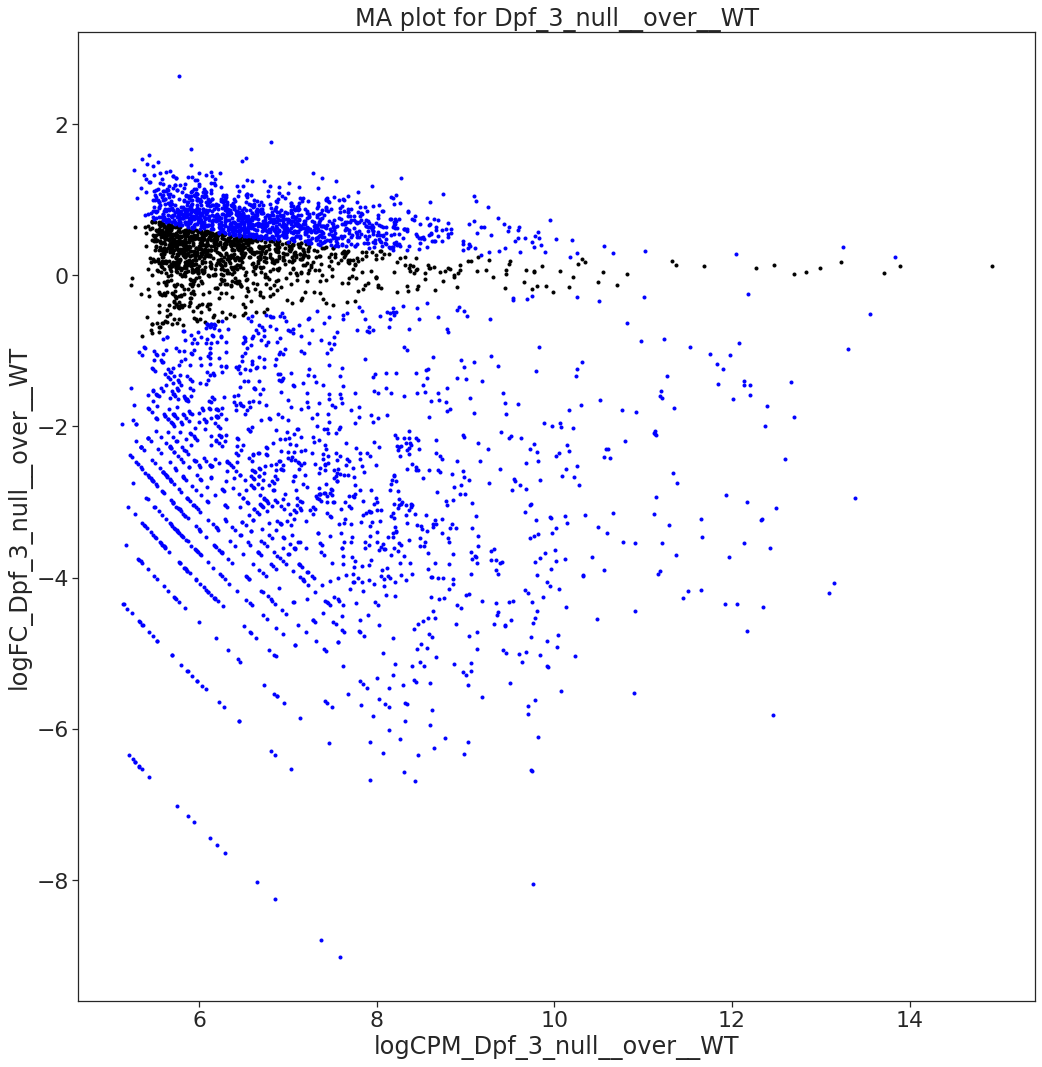

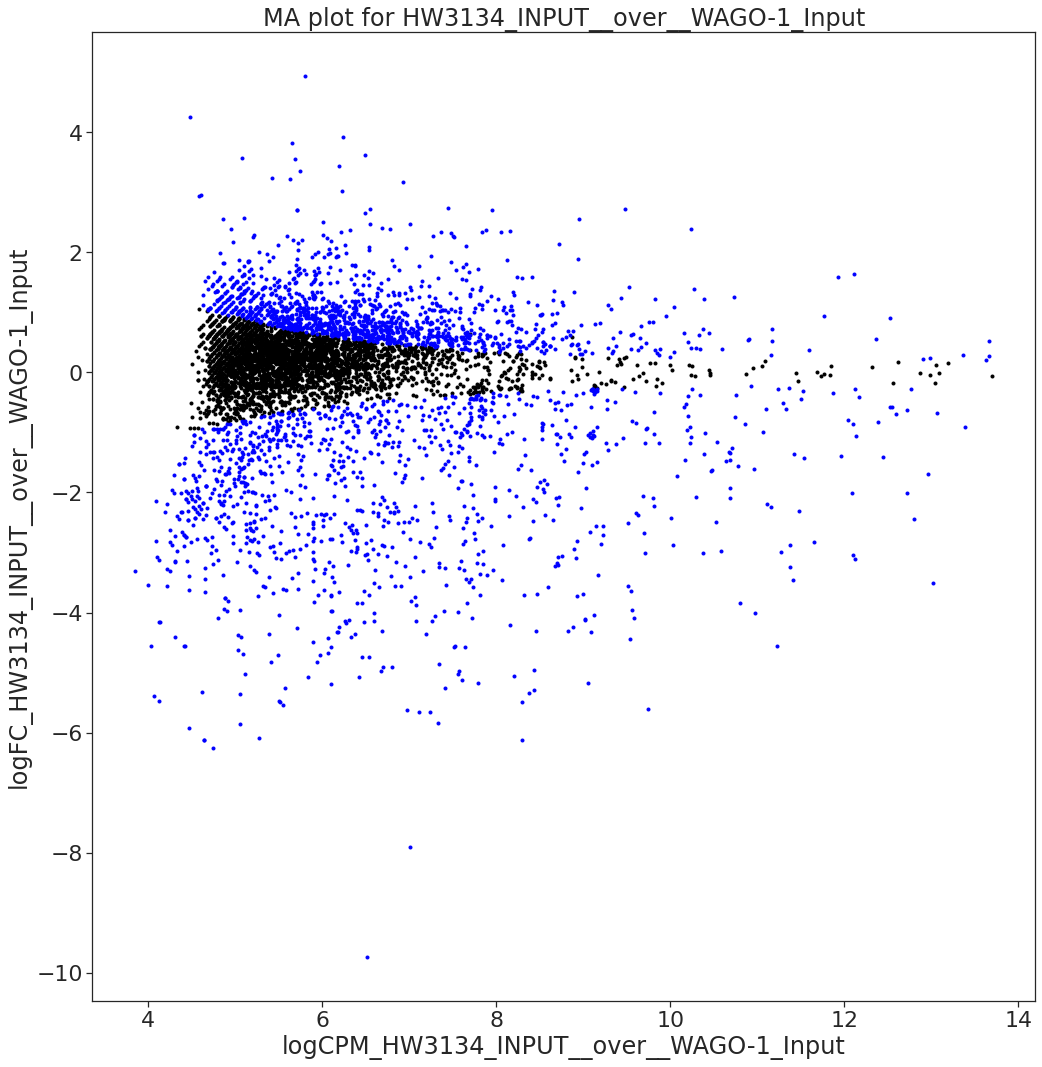

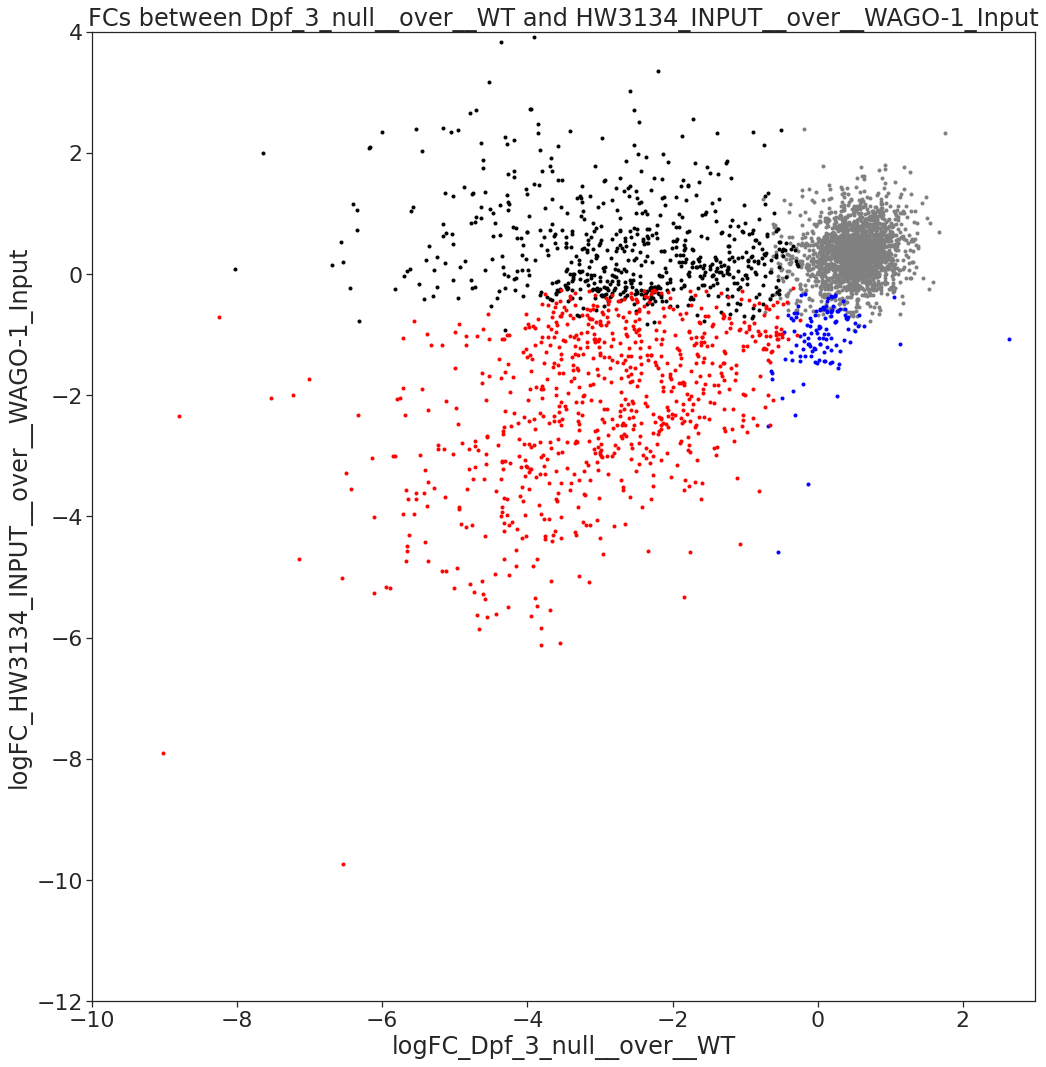

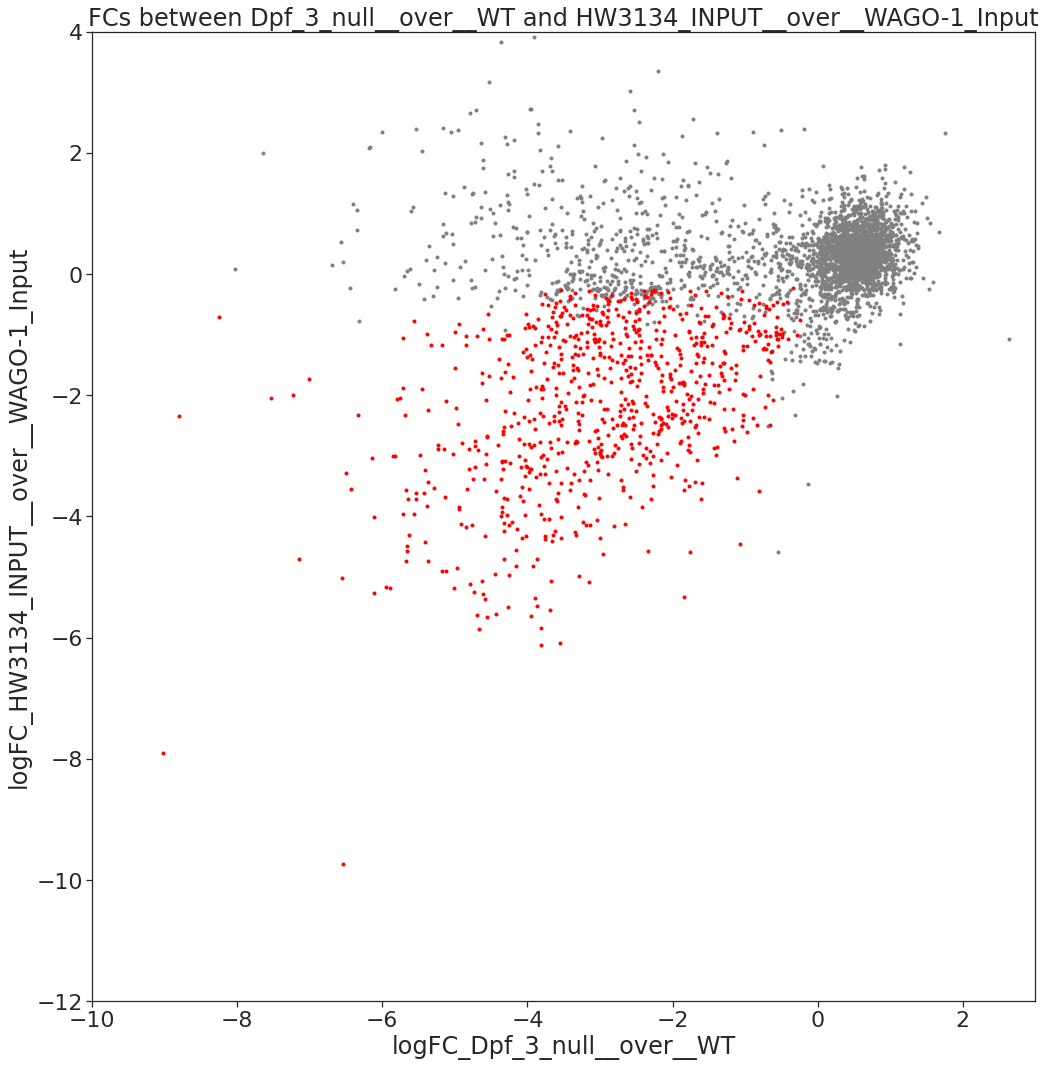

In [43]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

In [44]:
df_all[[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT  \
logFC_Dpf_3_null__over__WT              1.00000                      
logFC_HW3134_INPUT__over__WAGO-1_Input  0.51495                      

                                        logFC_HW3134_INPUT__over__WAGO-1_Input  
logFC_Dpf_3_null__over__WT              0.51495                                 
logFC_HW3134_INPUT__over__WAGO-1_Input  1.00000

In [45]:
df_all[df_all["Significant"] == f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"][[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT  \
logFC_Dpf_3_null__over__WT              1.000000                     
logFC_HW3134_INPUT__over__WAGO-1_Input  0.438738                     

                                        logFC_HW3134_INPUT__over__WAGO-1_Input  
logFC_Dpf_3_null__over__WT              0.438738                                
logFC_HW3134_INPUT__over__WAGO-1_Input  1.000000

## dpf-3 null over WT vs HW3135 input over WAGO-1 input

In [46]:
df_1_path = small_rna__WT__Dpf_3_null_path
df_1_name = small_rna__WT__Dpf_3_null_name

df_2_path = HW3135_INPUT__over__Input_WAGO_1_path
df_2_name = HW3135_INPUT__over__Input_WAGO_1_name

********************************************************************************
                                                                                                                                                  Significant
No                                                                                                                                                2107       
FDR_Dpf_3_null__over__WT<0.05\nlogFC_Dpf_3_null__over__WT<0\nFDR_HW3135_INPUT__over__WAGO-1_Input<0.05\nlogFC_HW3135_INPUT__over__WAGO-1_Input<0  1134       
FDR_Dpf_3_null__over__WT<0.05\nlogFC_Dpf_3_null__over__WT<0                                                                                       255        
FDR_HW3135_INPUT__over__WAGO-1_Input<0.05\nlogFC_HW3135_INPUT__over__WAGO-1_Input<0                                                               80         
********************************************************************************
                                                

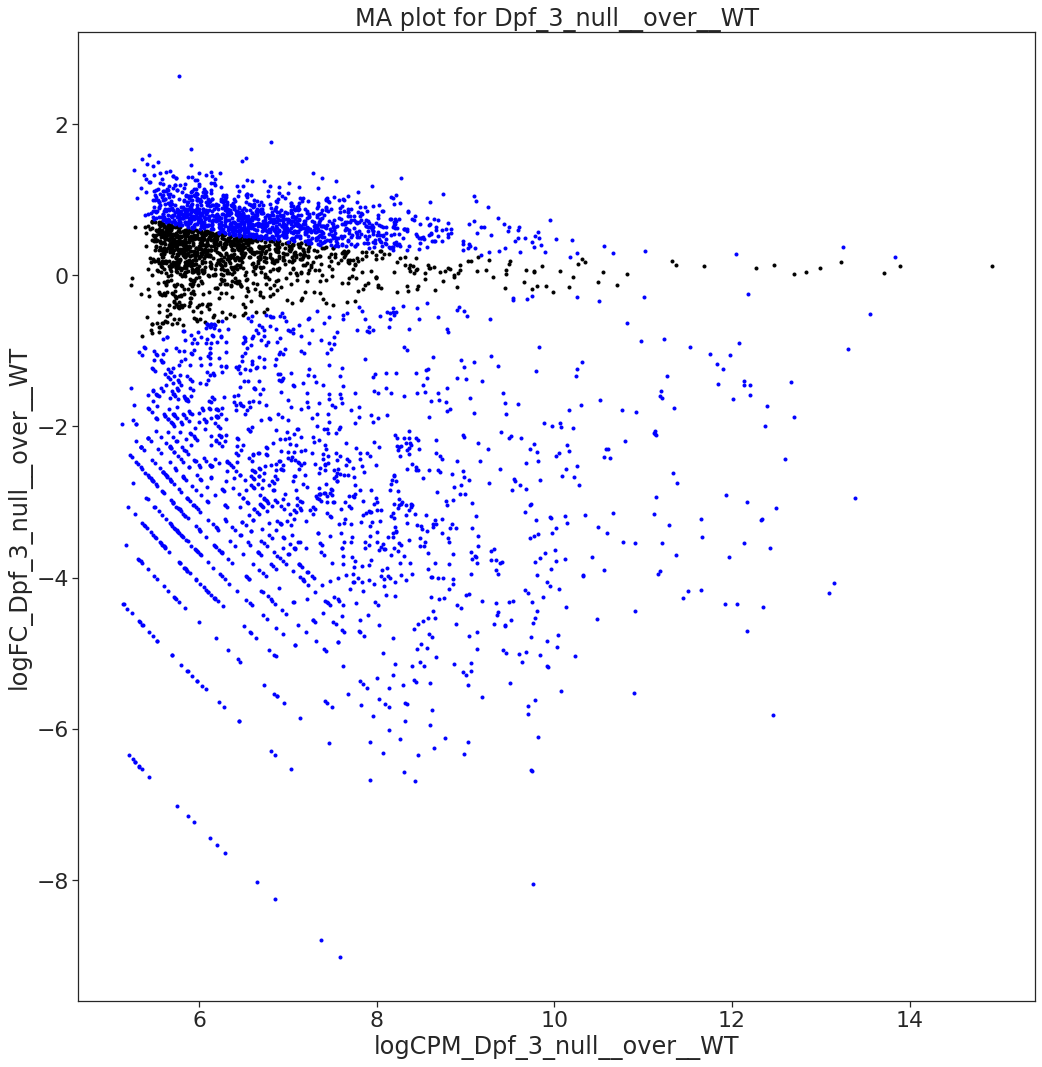

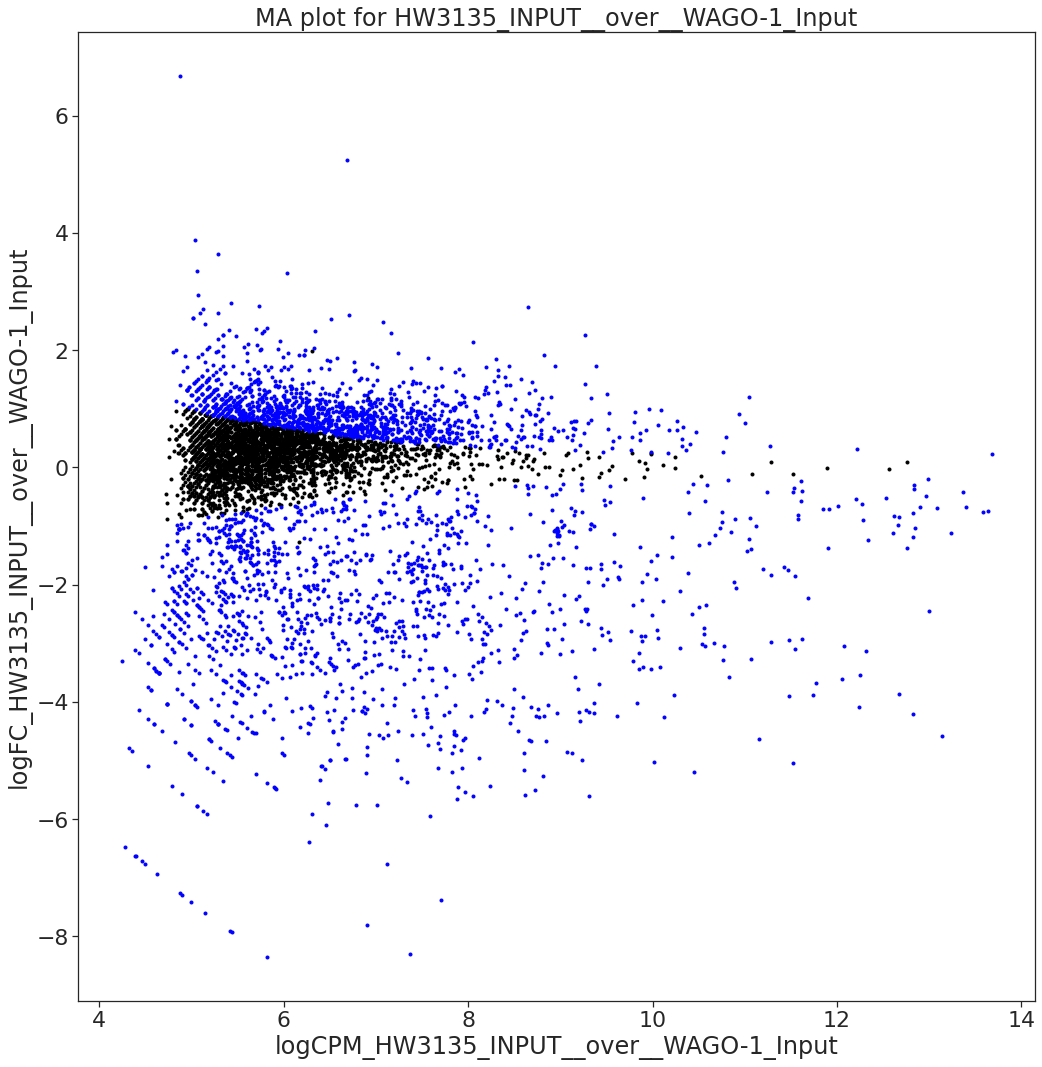

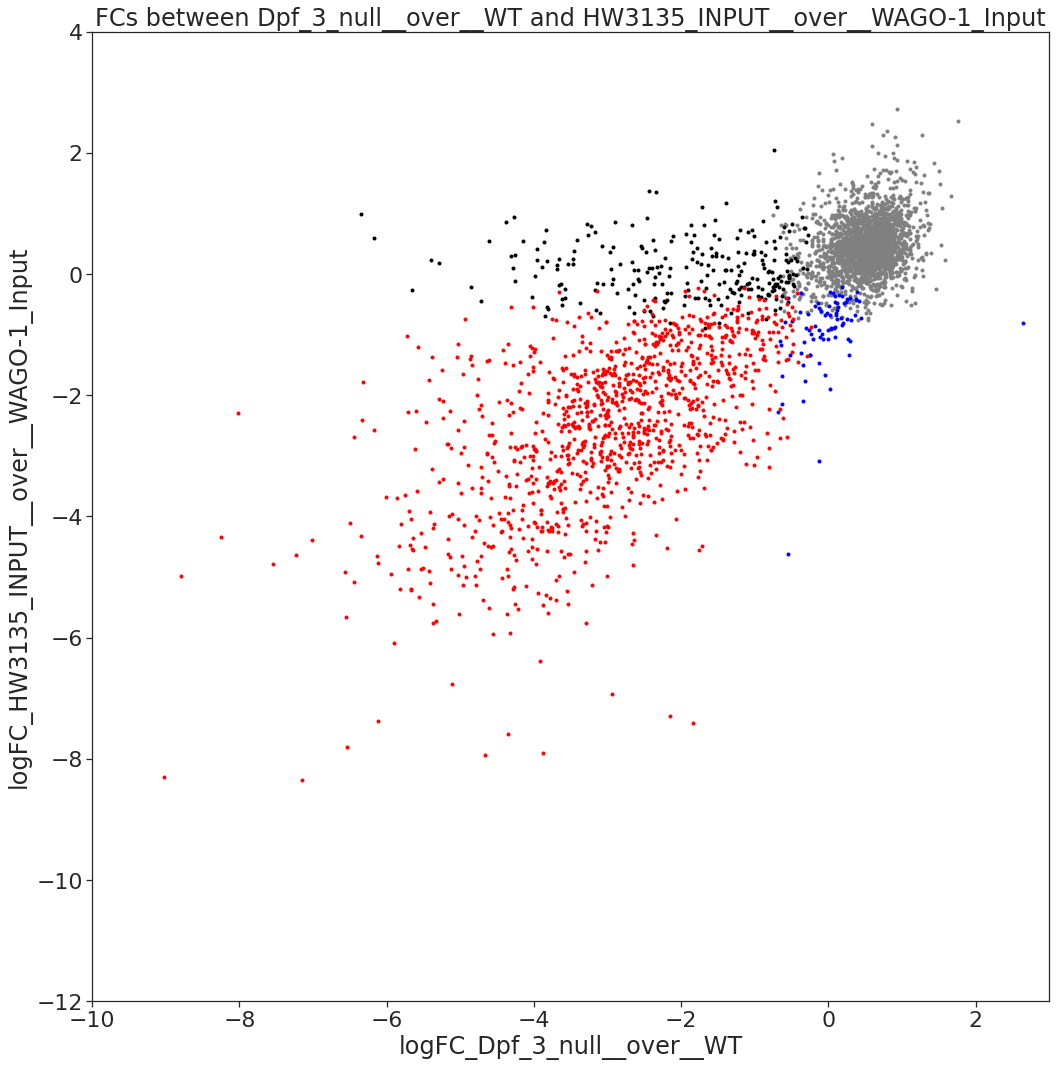

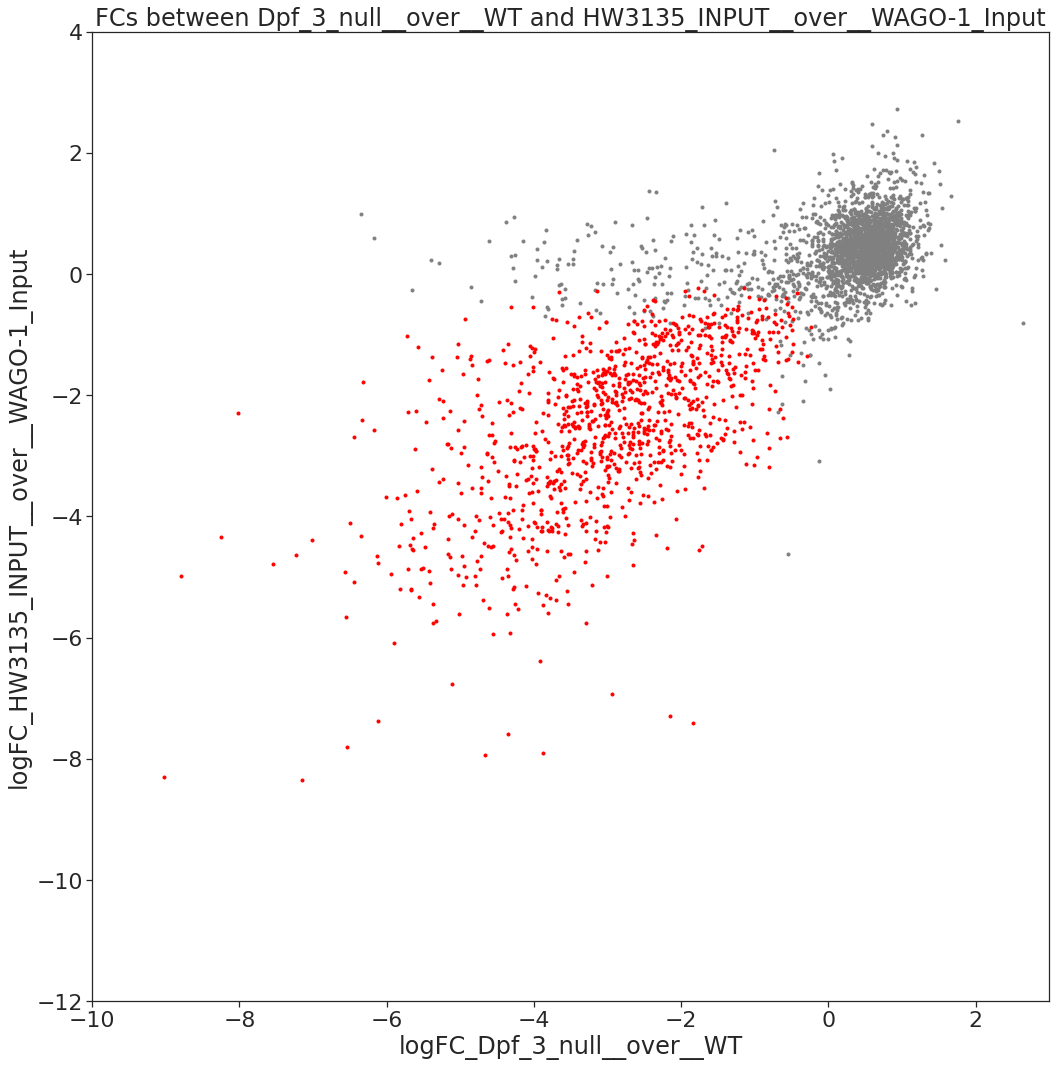

In [47]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["grey", "red",],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

In [48]:
df_all.columns

Index(['id', 'logFC_Dpf_3_null__over__WT', 'logCPM_Dpf_3_null__over__WT',
       'LR_Dpf_3_null__over__WT', 'PValue_Dpf_3_null__over__WT',
       'FDR_Dpf_3_null__over__WT', 'taxonomy_id_Dpf_3_null__over__WT',
       'gene_name_Dpf_3_null__over__WT', 'sequence_Dpf_3_null__over__WT',
       'status_Dpf_3_null__over__WT', 'gene_biotype_Dpf_3_null__over__WT',
       'repName_Dpf_3_null__over__WT', 'repClass_Dpf_3_null__over__WT',
       'repFamily_Dpf_3_null__over__WT', 'Significant_Dpf_3_null__over__WT',
       'logFC_HW3135_INPUT__over__WAGO-1_Input',
       'logCPM_HW3135_INPUT__over__WAGO-1_Input',
       'LR_HW3135_INPUT__over__WAGO-1_Input',
       'PValue_HW3135_INPUT__over__WAGO-1_Input',
       'FDR_HW3135_INPUT__over__WAGO-1_Input',
       'taxonomy_id_HW3135_INPUT__over__WAGO-1_Input',
       'gene_name_HW3135_INPUT__over__WAGO-1_Input',
       'sequence_HW3135_INPUT__over__WAGO-1_Input',
       'status_HW3135_INPUT__over__WAGO-1_Input',
       'gene_biotype_HW3135_INPUT__over_

In [49]:
df_all[[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT  \
logFC_Dpf_3_null__over__WT              1.000000                     
logFC_HW3135_INPUT__over__WAGO-1_Input  0.828824                     

                                        logFC_HW3135_INPUT__over__WAGO-1_Input  
logFC_Dpf_3_null__over__WT              0.828824                                
logFC_HW3135_INPUT__over__WAGO-1_Input  1.000000

In [50]:
df_all[df_all["Significant"] == f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"][[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT  \
logFC_Dpf_3_null__over__WT              1.000000                     
logFC_HW3135_INPUT__over__WAGO-1_Input  0.587758                     

                                        logFC_HW3135_INPUT__over__WAGO-1_Input  
logFC_Dpf_3_null__over__WT              0.587758                                
logFC_HW3135_INPUT__over__WAGO-1_Input  1.000000

## dpf-3 S784A over WT vs HW3134 input over WAGO-1 input

In [51]:
df_1_path = small_rna__WT__Dpf_3_S784A_path
df_1_name = small_rna__WT__Dpf_3_S784A_name

df_2_path = HW3134_INPUT__over__Input_WAGO_1_path
df_2_name = HW3134_INPUT__over__Input_WAGO_1_name

********************************************************************************
                                                                                                                                                    Significant
No                                                                                                                                                  1641       
FDR_Dpf_3_S784A__over__WT<0.05\nlogFC_Dpf_3_S784A__over__WT<0\nFDR_HW3134_INPUT__over__WAGO-1_Input<0.05\nlogFC_HW3134_INPUT__over__WAGO-1_Input<0  725        
FDR_Dpf_3_S784A__over__WT<0.05\nlogFC_Dpf_3_S784A__over__WT<0                                                                                       579        
FDR_HW3134_INPUT__over__WAGO-1_Input<0.05\nlogFC_HW3134_INPUT__over__WAGO-1_Input<0                                                                 136        
********************************************************************************
                                      

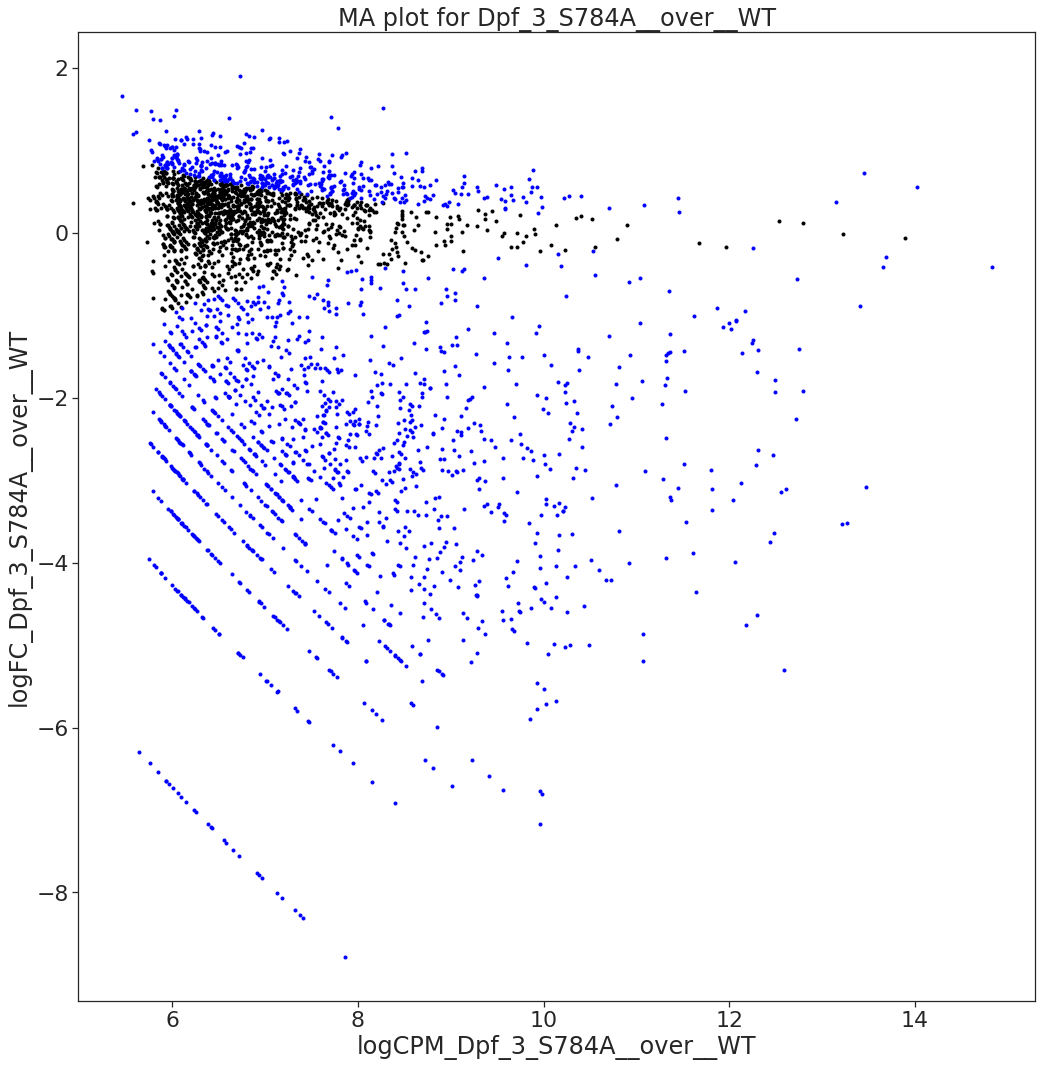

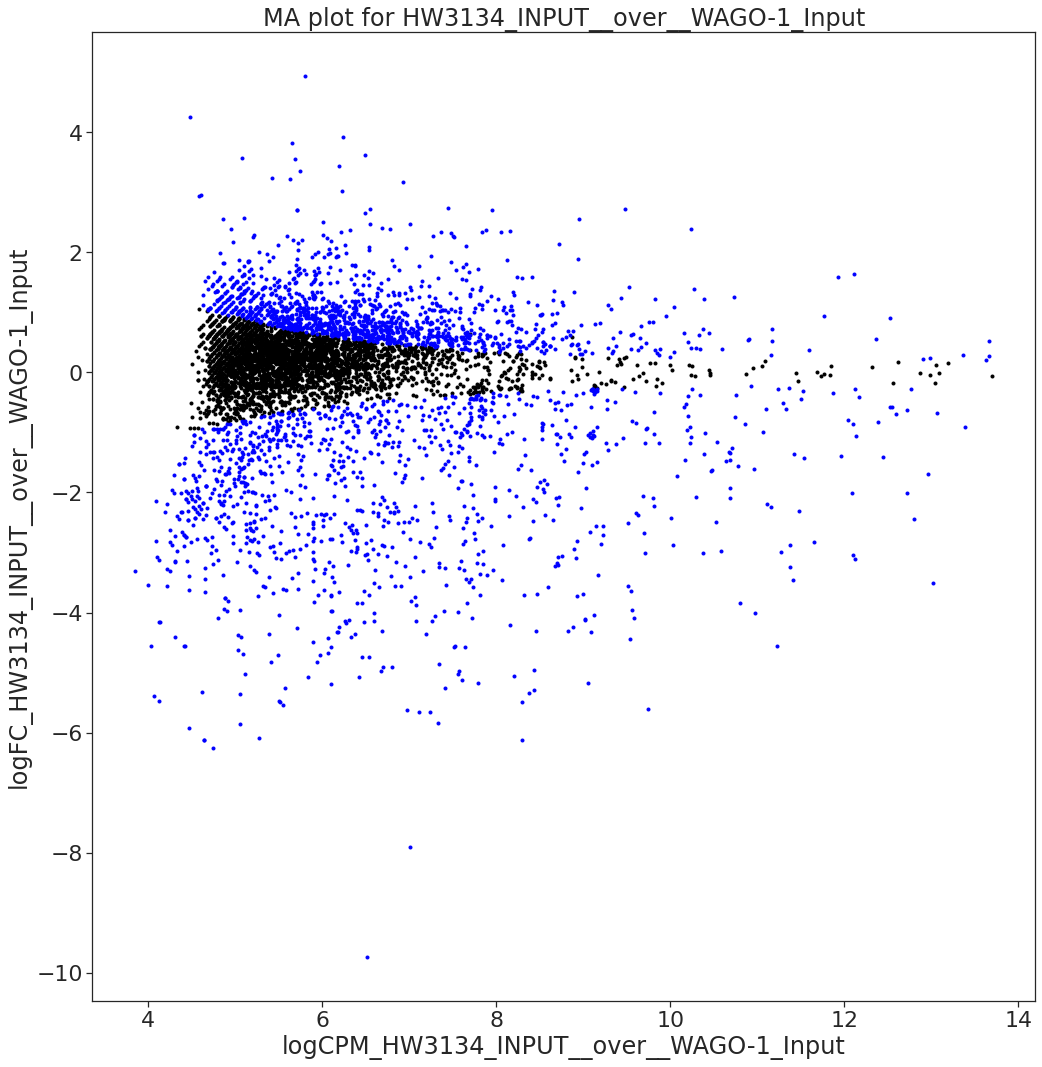

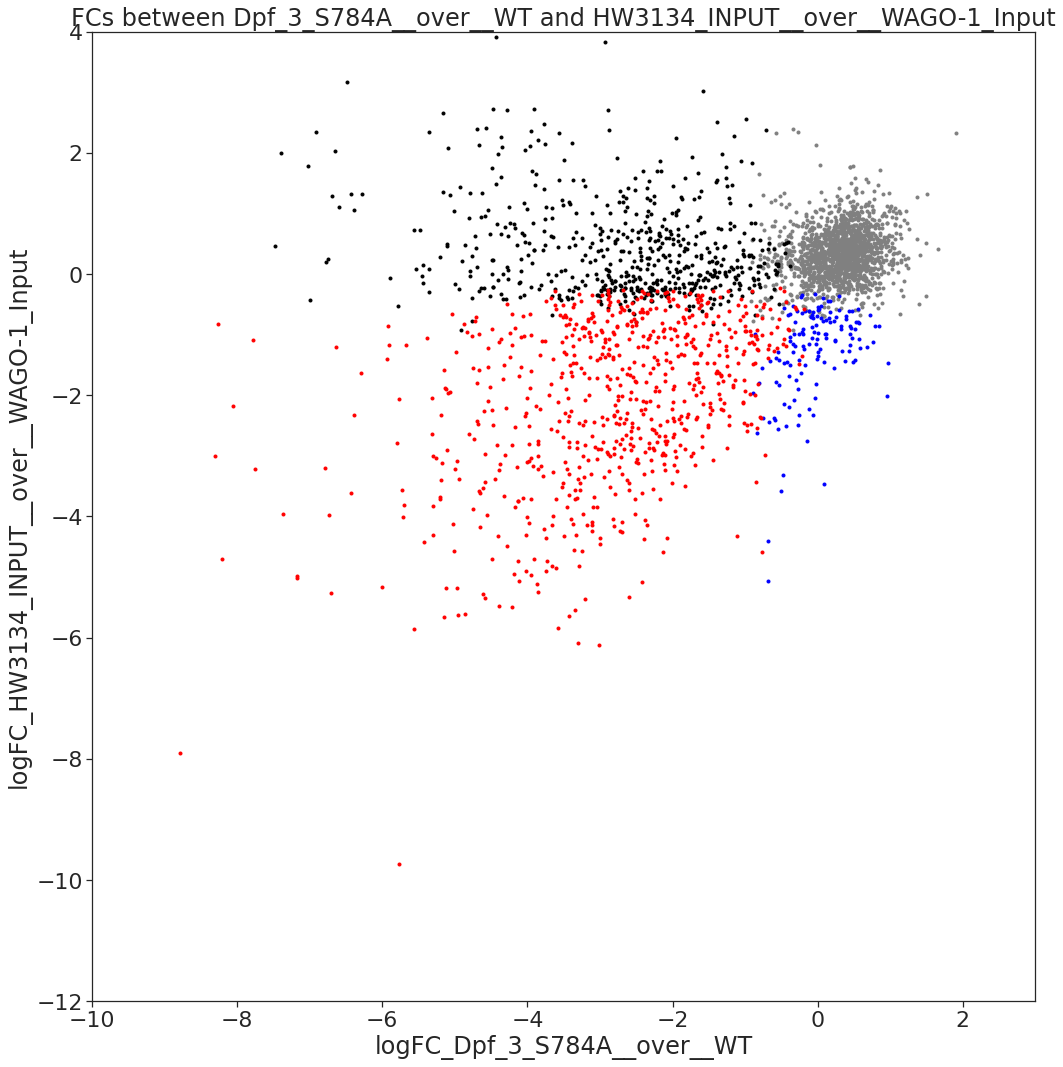

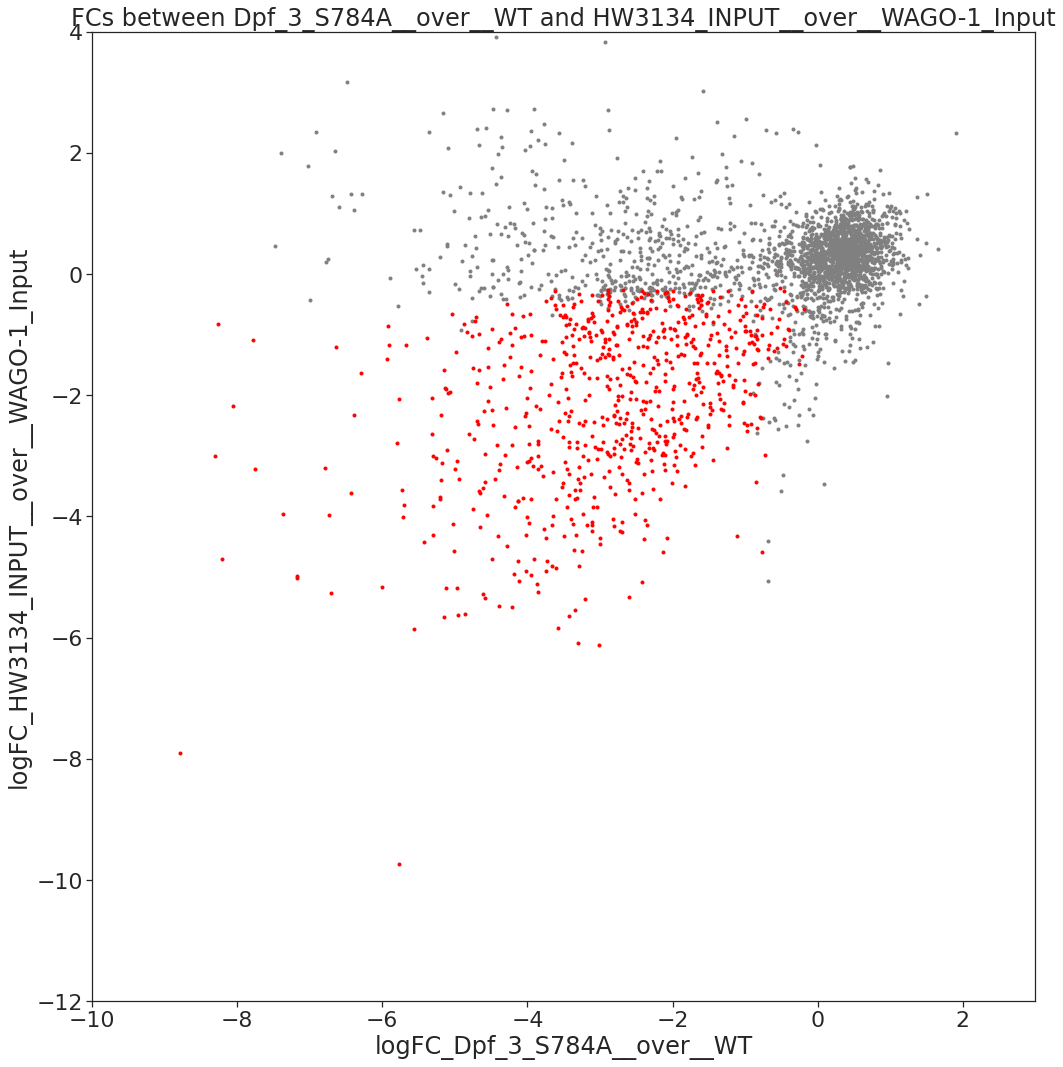

In [52]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["grey", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

In [53]:
df_all[[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_S784A__over__WT  \
logFC_Dpf_3_S784A__over__WT             1.000000                      
logFC_HW3134_INPUT__over__WAGO-1_Input  0.471332                      

                                        logFC_HW3134_INPUT__over__WAGO-1_Input  
logFC_Dpf_3_S784A__over__WT             0.471332                                
logFC_HW3134_INPUT__over__WAGO-1_Input  1.000000

In [54]:
df_all[df_all["Significant"] == f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"][[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_S784A__over__WT  \
logFC_Dpf_3_S784A__over__WT             1.000000                      
logFC_HW3134_INPUT__over__WAGO-1_Input  0.400931                      

                                        logFC_HW3134_INPUT__over__WAGO-1_Input  
logFC_Dpf_3_S784A__over__WT             0.400931                                
logFC_HW3134_INPUT__over__WAGO-1_Input  1.000000

## dpf-3 S784A over WT vs HW3135 input over WAGO-1 input

In [55]:
df_1_path = small_rna__WT__Dpf_3_S784A_path
df_1_name = small_rna__WT__Dpf_3_S784A_name

df_2_path = HW3135_INPUT__over__Input_WAGO_1_path
df_2_name = HW3135_INPUT__over__Input_WAGO_1_name

********************************************************************************
                                                                                                                                                    Significant
No                                                                                                                                                  1666       
FDR_Dpf_3_S784A__over__WT<0.05\nlogFC_Dpf_3_S784A__over__WT<0\nFDR_HW3135_INPUT__over__WAGO-1_Input<0.05\nlogFC_HW3135_INPUT__over__WAGO-1_Input<0  1036       
FDR_Dpf_3_S784A__over__WT<0.05\nlogFC_Dpf_3_S784A__over__WT<0                                                                                       211        
FDR_HW3135_INPUT__over__WAGO-1_Input<0.05\nlogFC_HW3135_INPUT__over__WAGO-1_Input<0                                                                 120        
********************************************************************************
                                      

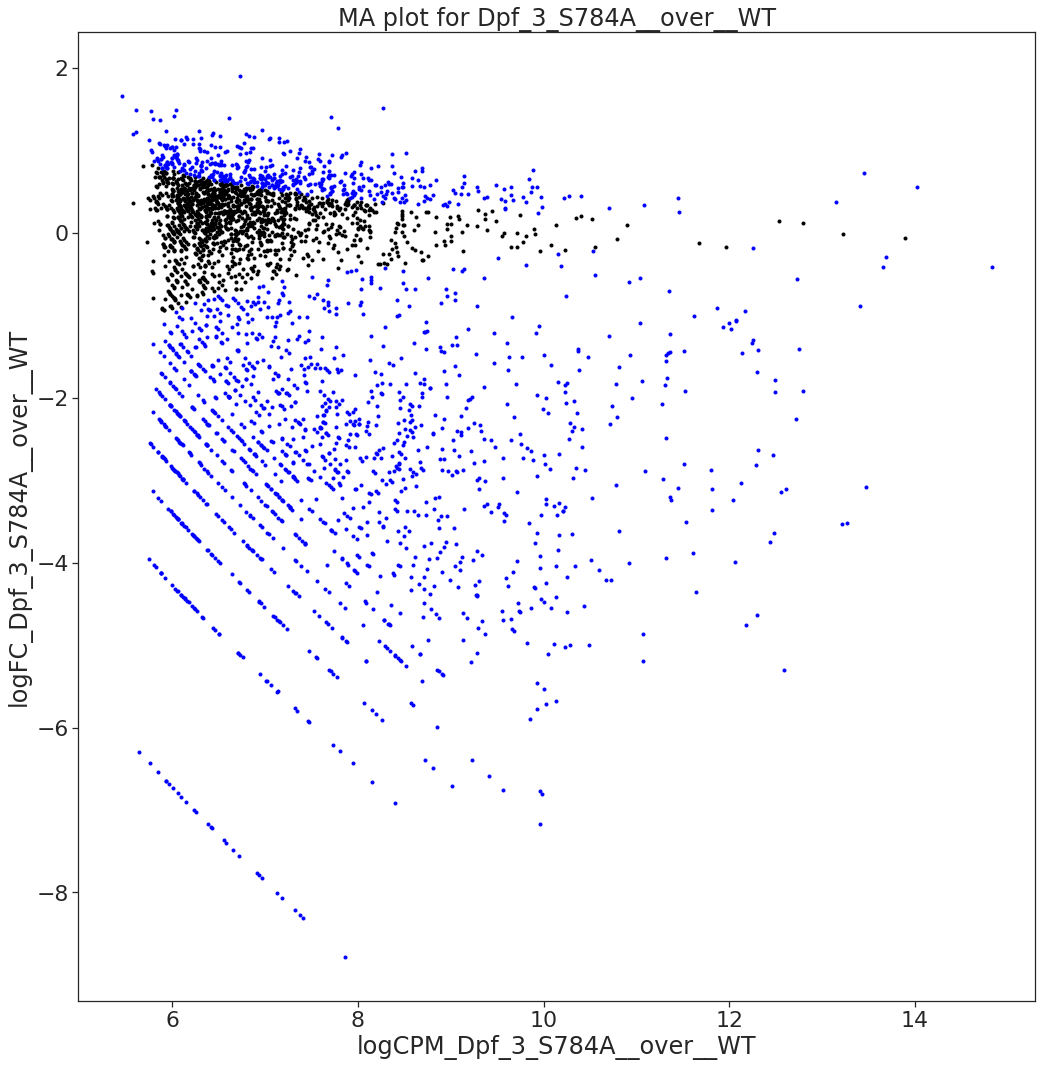

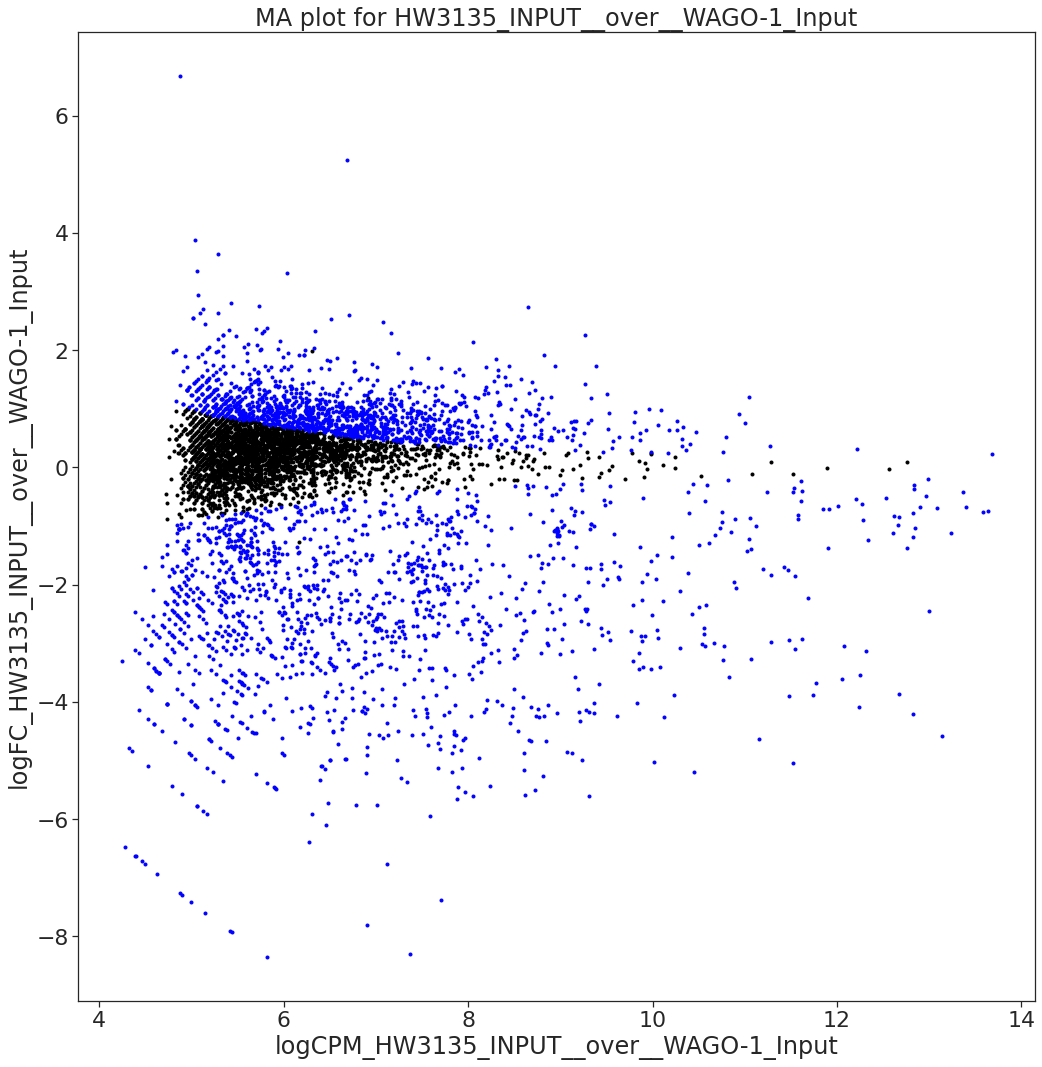

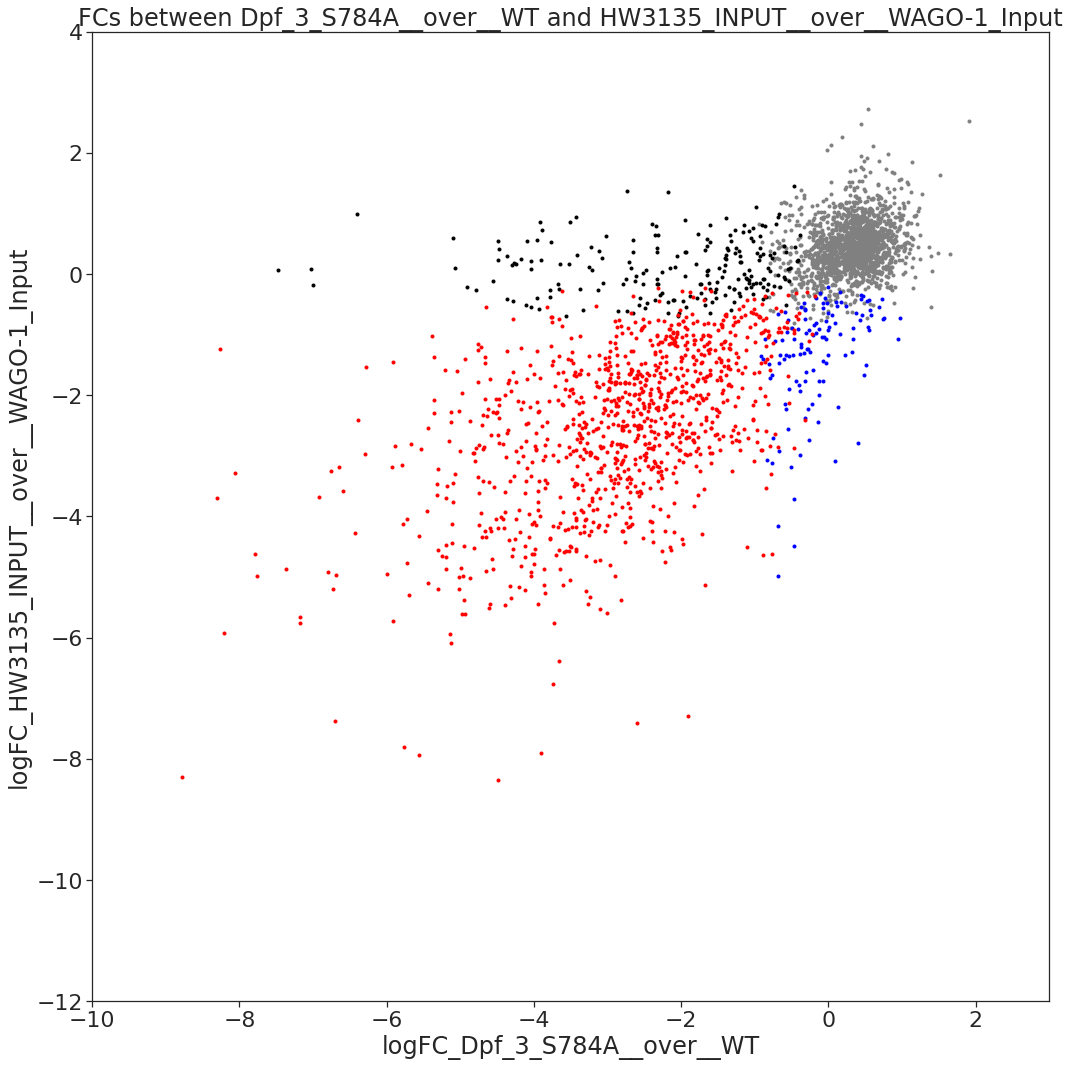

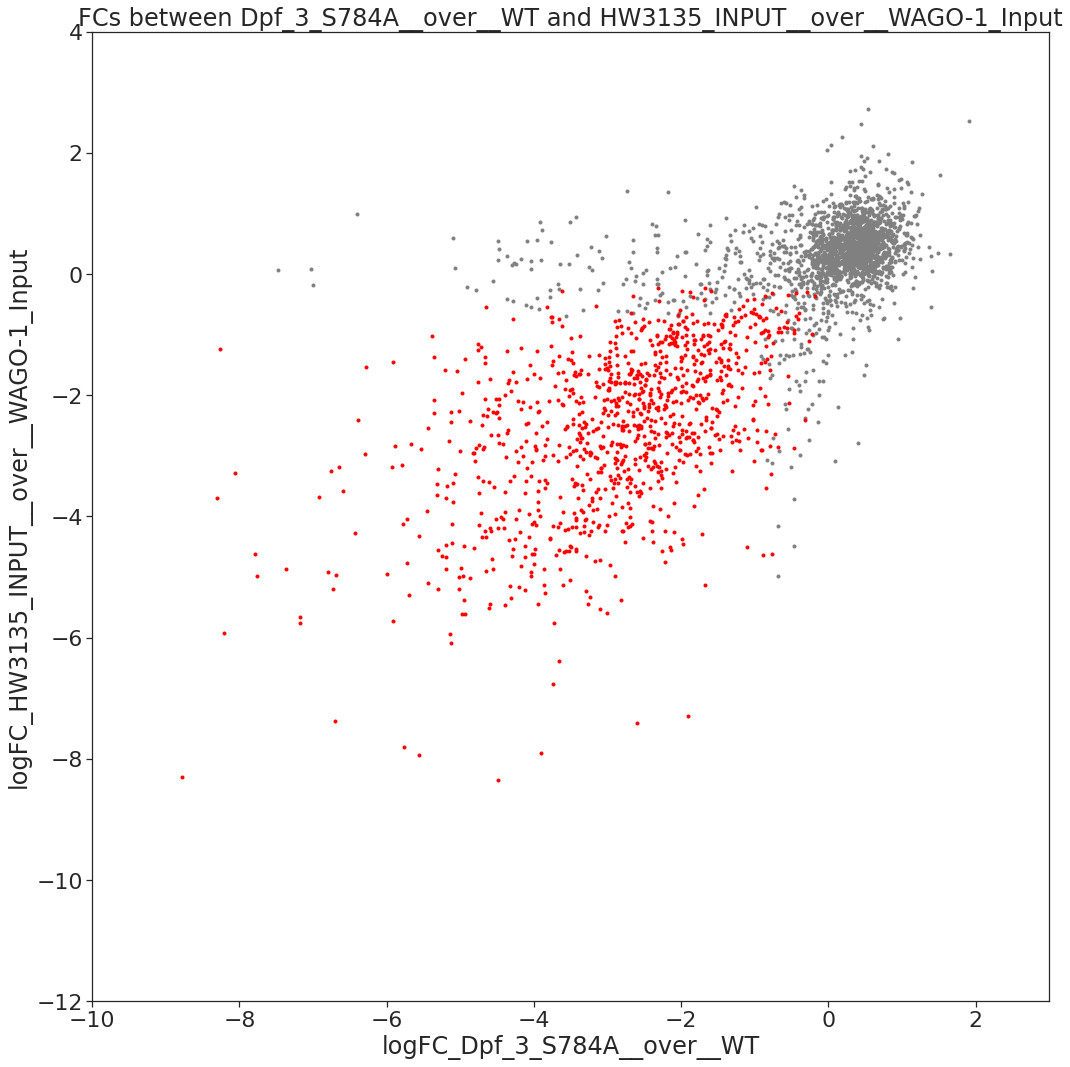

In [56]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["grey", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

In [57]:
df_all.columns

Index(['id', 'logFC_Dpf_3_S784A__over__WT', 'logCPM_Dpf_3_S784A__over__WT',
       'LR_Dpf_3_S784A__over__WT', 'PValue_Dpf_3_S784A__over__WT',
       'FDR_Dpf_3_S784A__over__WT', 'taxonomy_id_Dpf_3_S784A__over__WT',
       'gene_name_Dpf_3_S784A__over__WT', 'sequence_Dpf_3_S784A__over__WT',
       'status_Dpf_3_S784A__over__WT', 'gene_biotype_Dpf_3_S784A__over__WT',
       'repName_Dpf_3_S784A__over__WT', 'repClass_Dpf_3_S784A__over__WT',
       'repFamily_Dpf_3_S784A__over__WT', 'Significant_Dpf_3_S784A__over__WT',
       'logFC_HW3135_INPUT__over__WAGO-1_Input',
       'logCPM_HW3135_INPUT__over__WAGO-1_Input',
       'LR_HW3135_INPUT__over__WAGO-1_Input',
       'PValue_HW3135_INPUT__over__WAGO-1_Input',
       'FDR_HW3135_INPUT__over__WAGO-1_Input',
       'taxonomy_id_HW3135_INPUT__over__WAGO-1_Input',
       'gene_name_HW3135_INPUT__over__WAGO-1_Input',
       'sequence_HW3135_INPUT__over__WAGO-1_Input',
       'status_HW3135_INPUT__over__WAGO-1_Input',
       'gene_biotype_HW313

In [58]:
df_all[[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_S784A__over__WT  \
logFC_Dpf_3_S784A__over__WT             1.00000                       
logFC_HW3135_INPUT__over__WAGO-1_Input  0.78483                       

                                        logFC_HW3135_INPUT__over__WAGO-1_Input  
logFC_Dpf_3_S784A__over__WT             0.78483                                 
logFC_HW3135_INPUT__over__WAGO-1_Input  1.00000

In [59]:
df_all[df_all["Significant"] == f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"][[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_S784A__over__WT  \
logFC_Dpf_3_S784A__over__WT             1.000000                      
logFC_HW3135_INPUT__over__WAGO-1_Input  0.512752                      

                                        logFC_HW3135_INPUT__over__WAGO-1_Input  
logFC_Dpf_3_S784A__over__WT             0.512752                                
logFC_HW3135_INPUT__over__WAGO-1_Input  1.000000

## dpf-3 null over WT vs Wago-1 P3G Input over WAGO-1 Input

In [60]:
df_1_path = small_rna__WT__Dpf_3_null_path
df_1_name = small_rna__WT__Dpf_3_null_name

df_2_path = Input_WAGO_1_P3G__over__Input_WAGO_1_path
df_2_name = Input_WAGO_1_P3G__over__Input_WAGO_1_name

********************************************************************************
                                                                                                                                                          Significant
No                                                                                                                                                        1530       
FDR_Dpf_3_null__over__WT<0.05\nlogFC_Dpf_3_null__over__WT<0                                                                                               796        
FDR_Dpf_3_null__over__WT<0.05\nlogFC_Dpf_3_null__over__WT<0\nFDR_WAGO-1-P3G_Input__over__WAGO-1_Input<0.05\nlogFC_WAGO-1-P3G_Input__over__WAGO-1_Input<0  447        
FDR_WAGO-1-P3G_Input__over__WAGO-1_Input<0.05\nlogFC_WAGO-1-P3G_Input__over__WAGO-1_Input<0                                                               35         
********************************************************************************
        

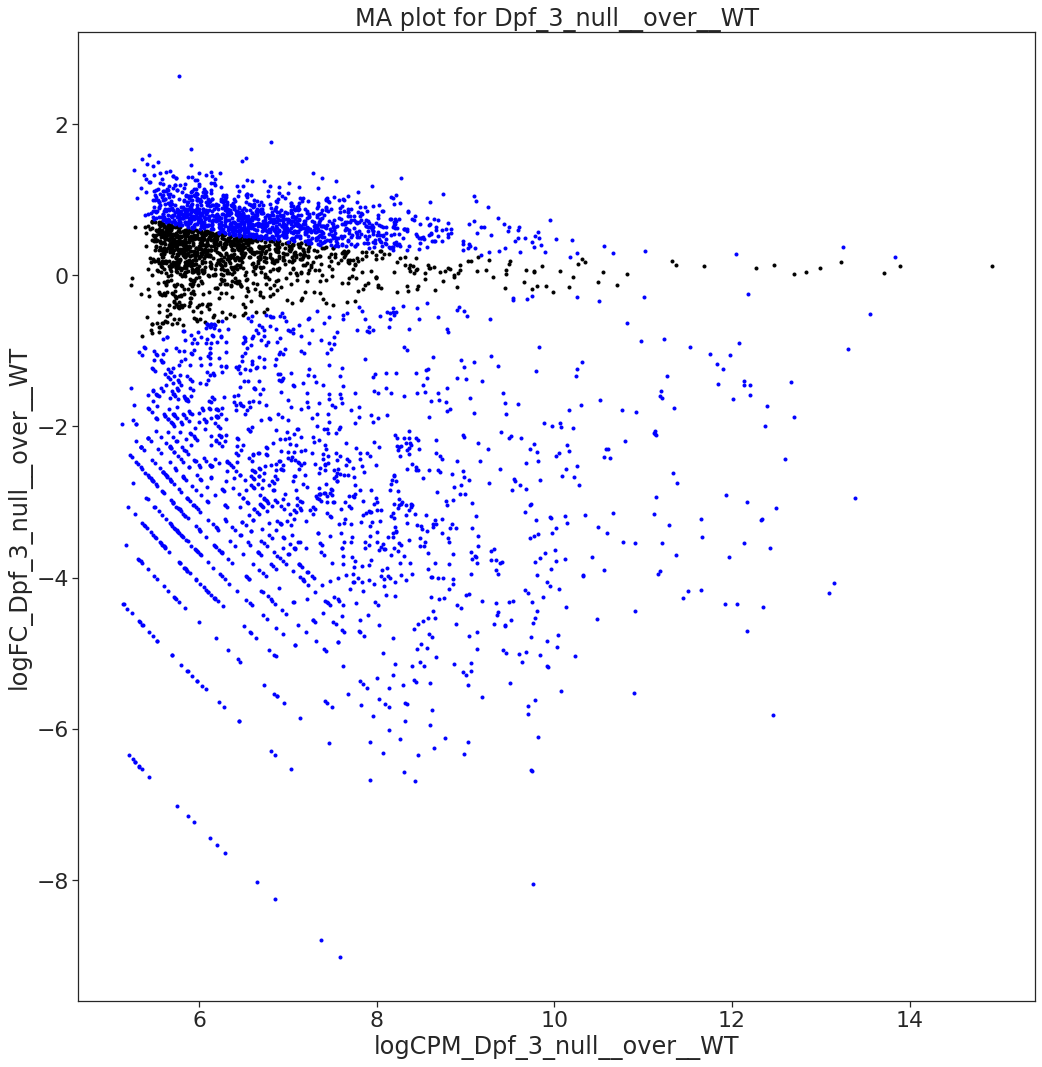

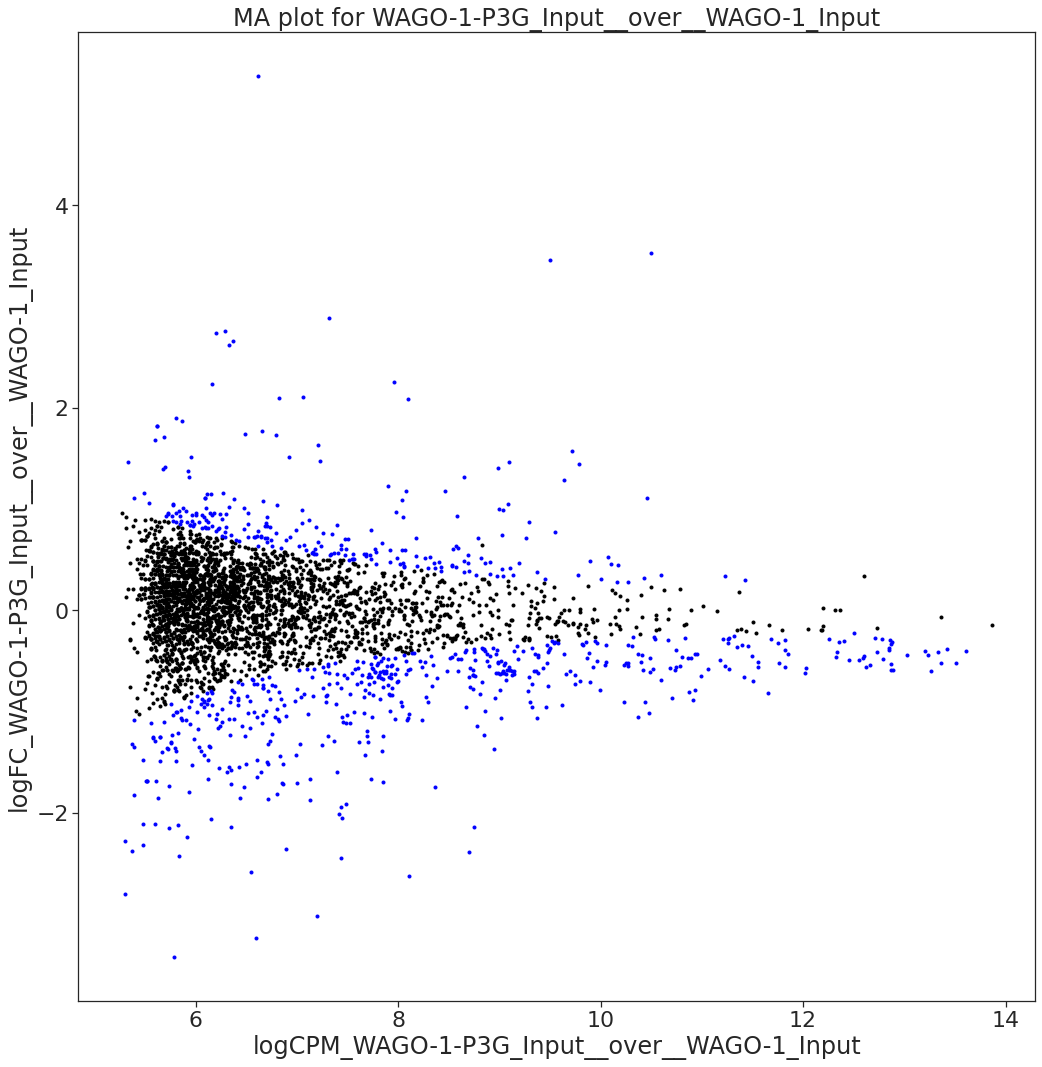

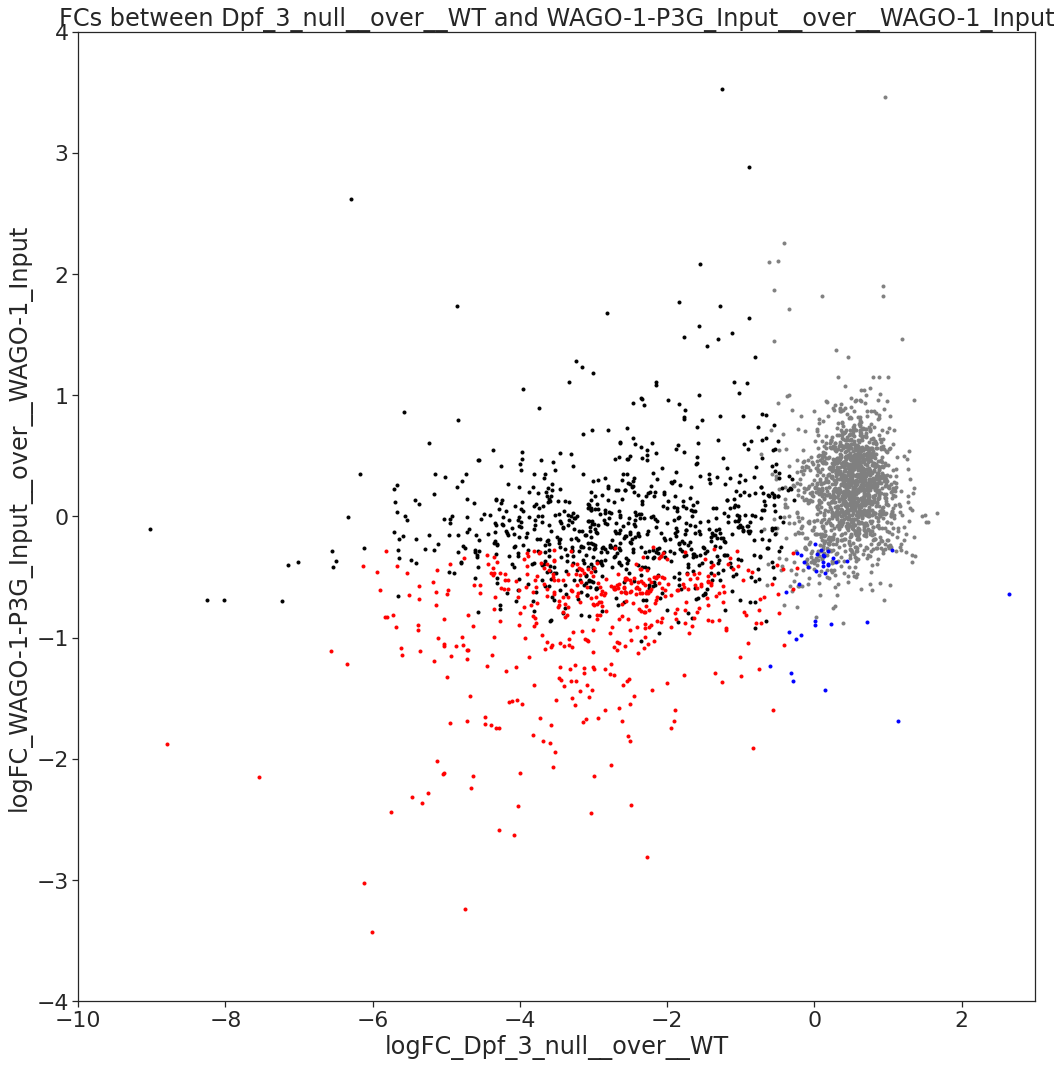

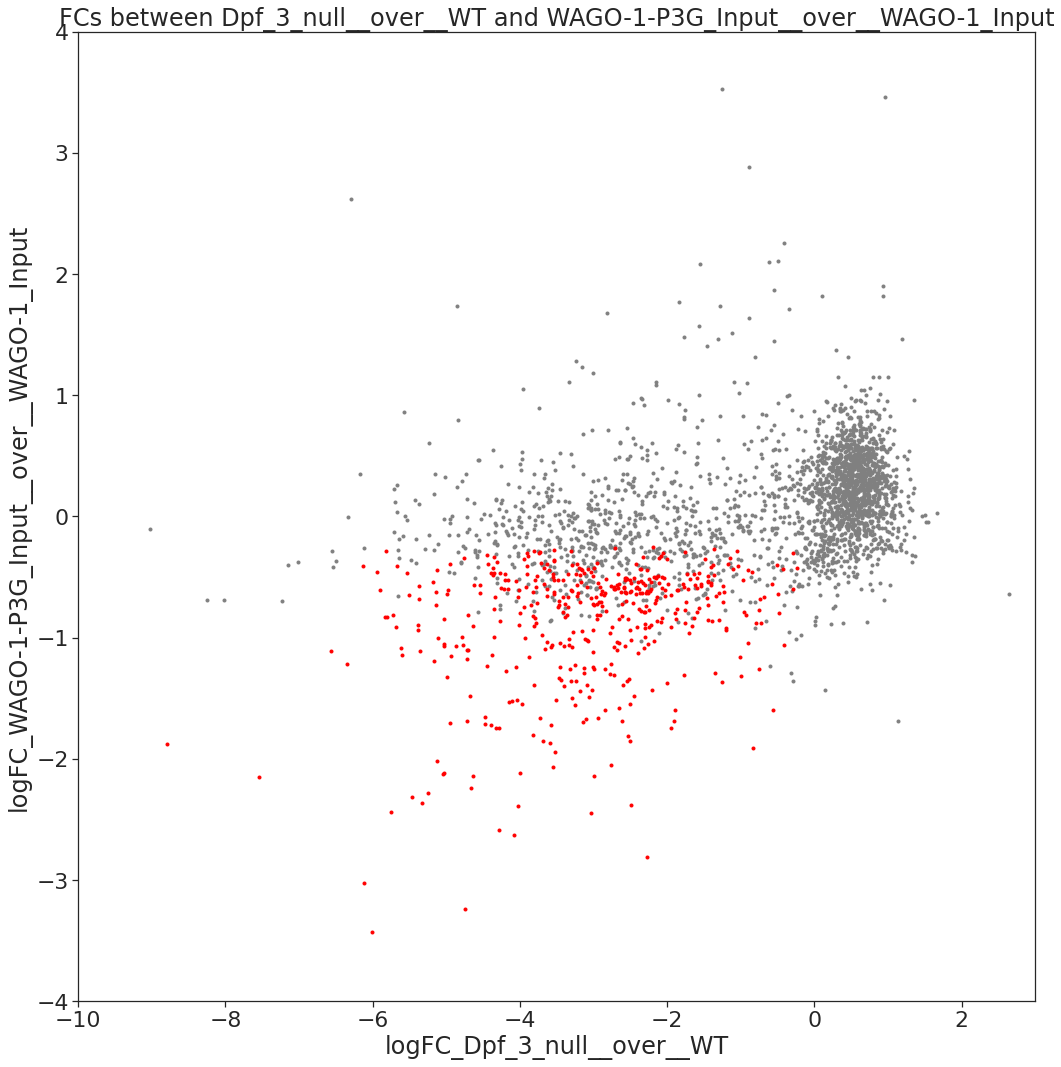

In [61]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=False)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=(-4,4))

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=(-4,4))


plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

In [62]:
df_all[[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT  \
logFC_Dpf_3_null__over__WT                  1.000000                     
logFC_WAGO-1-P3G_Input__over__WAGO-1_Input  0.495176                     

                                            logFC_WAGO-1-P3G_Input__over__WAGO-1_Input  
logFC_Dpf_3_null__over__WT                  0.495176                                    
logFC_WAGO-1-P3G_Input__over__WAGO-1_Input  1.000000

In [63]:
df_all[df_all["Significant"] == f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"][[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_null__over__WT  \
logFC_Dpf_3_null__over__WT                  1.000000                     
logFC_WAGO-1-P3G_Input__over__WAGO-1_Input  0.280271                     

                                            logFC_WAGO-1-P3G_Input__over__WAGO-1_Input  
logFC_Dpf_3_null__over__WT                  0.280271                                    
logFC_WAGO-1-P3G_Input__over__WAGO-1_Input  1.000000

## dpf-3 S784A over WT vs Wago-1 P3G Input over WAGO-1 Input

In [64]:
df_1_path = small_rna__WT__Dpf_3_S784A_path
df_1_name = small_rna__WT__Dpf_3_S784A_name

df_2_path = Input_WAGO_1_P3G__over__Input_WAGO_1_path
df_2_name = Input_WAGO_1_P3G__over__Input_WAGO_1_name

********************************************************************************
                                                                                                                                                            Significant
No                                                                                                                                                          1399       
FDR_Dpf_3_S784A__over__WT<0.05\nlogFC_Dpf_3_S784A__over__WT<0                                                                                               701        
FDR_Dpf_3_S784A__over__WT<0.05\nlogFC_Dpf_3_S784A__over__WT<0\nFDR_WAGO-1-P3G_Input__over__WAGO-1_Input<0.05\nlogFC_WAGO-1-P3G_Input__over__WAGO-1_Input<0  439        
FDR_WAGO-1-P3G_Input__over__WAGO-1_Input<0.05\nlogFC_WAGO-1-P3G_Input__over__WAGO-1_Input<0                                                                 34         
*******************************************************************************

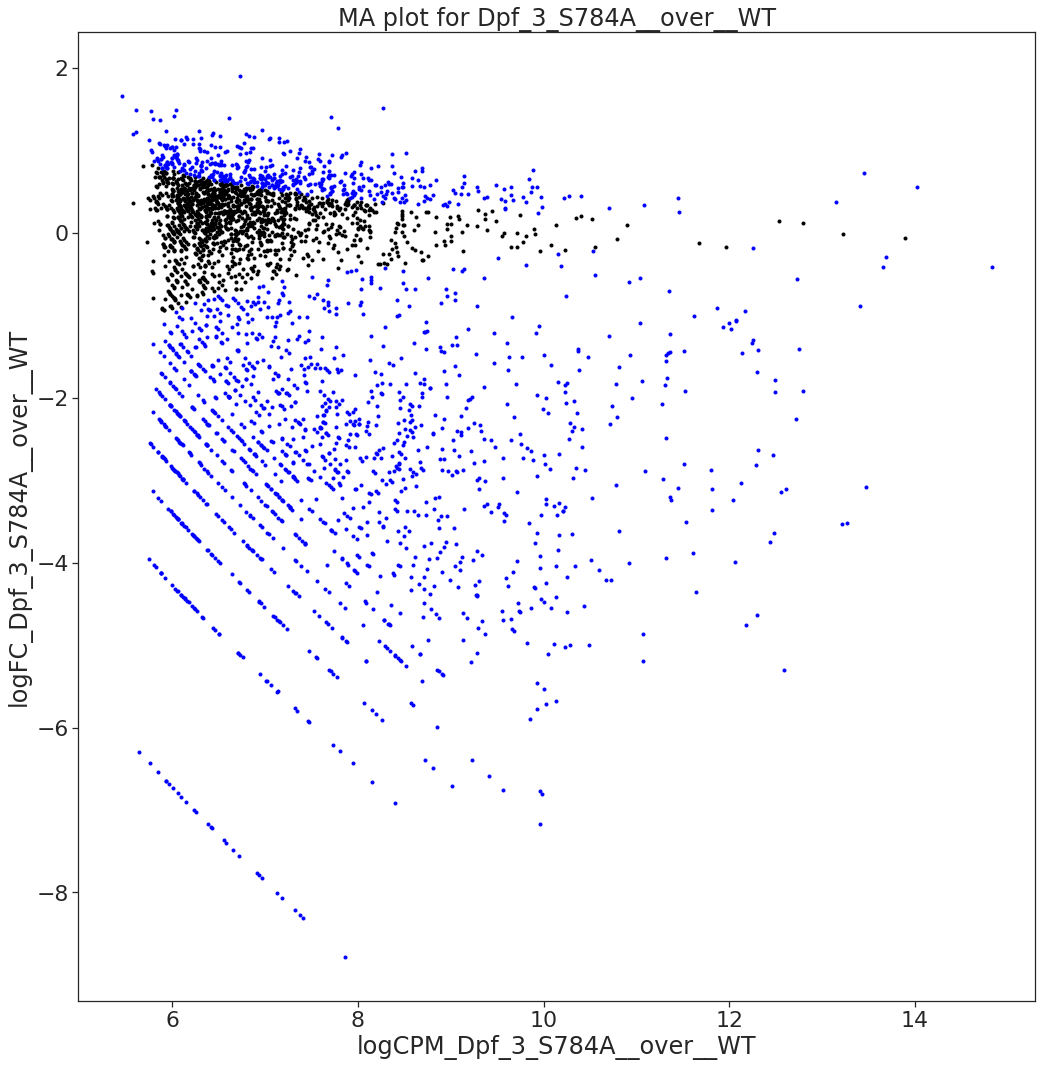

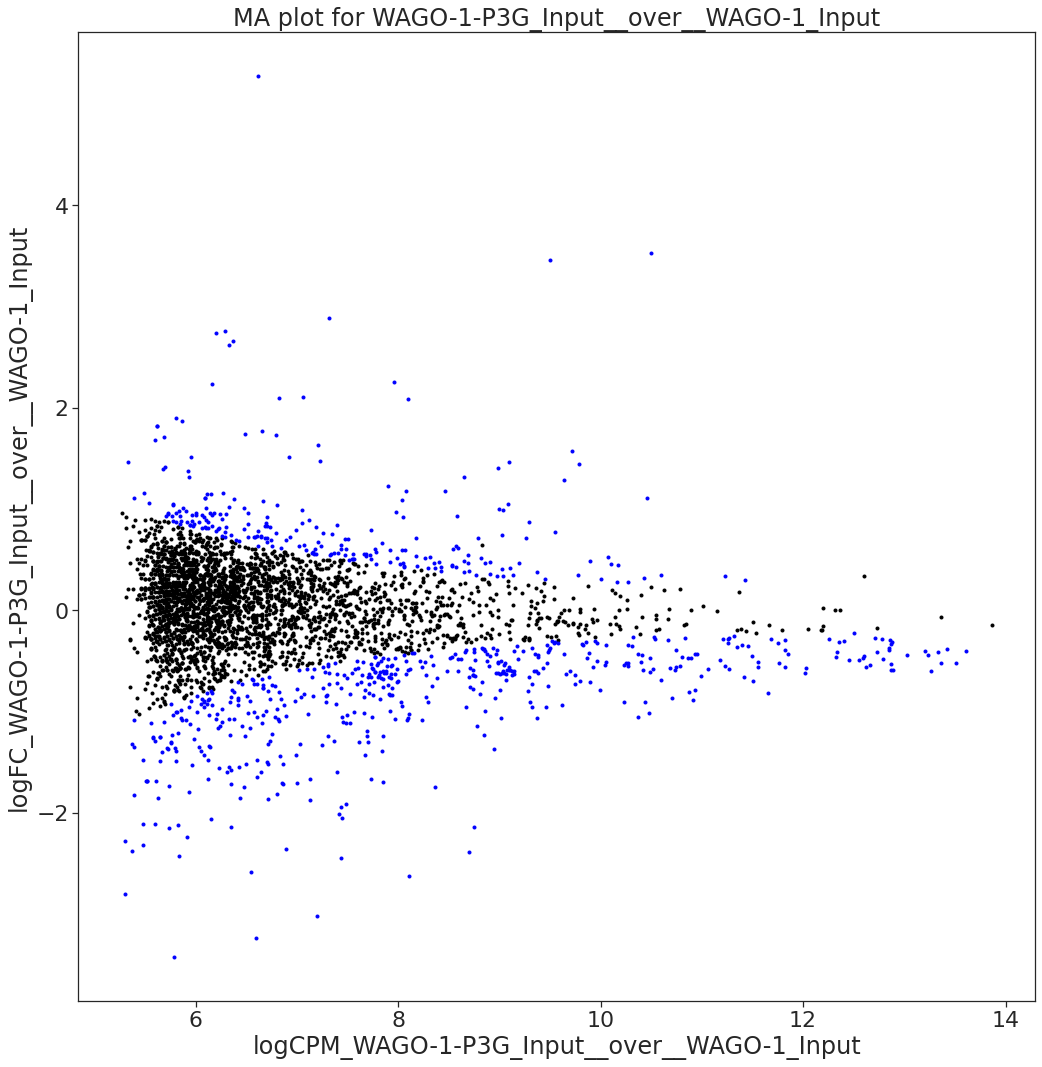

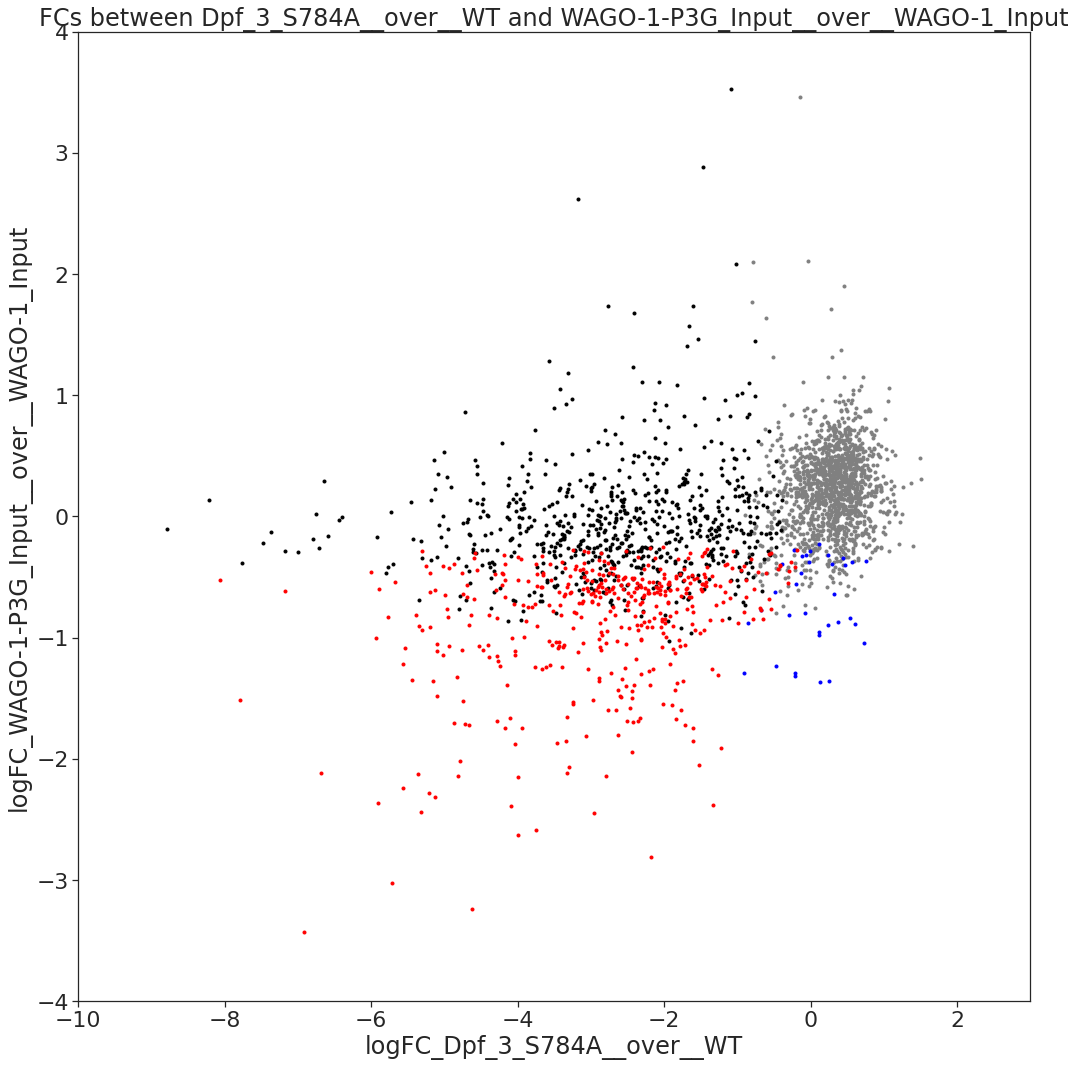

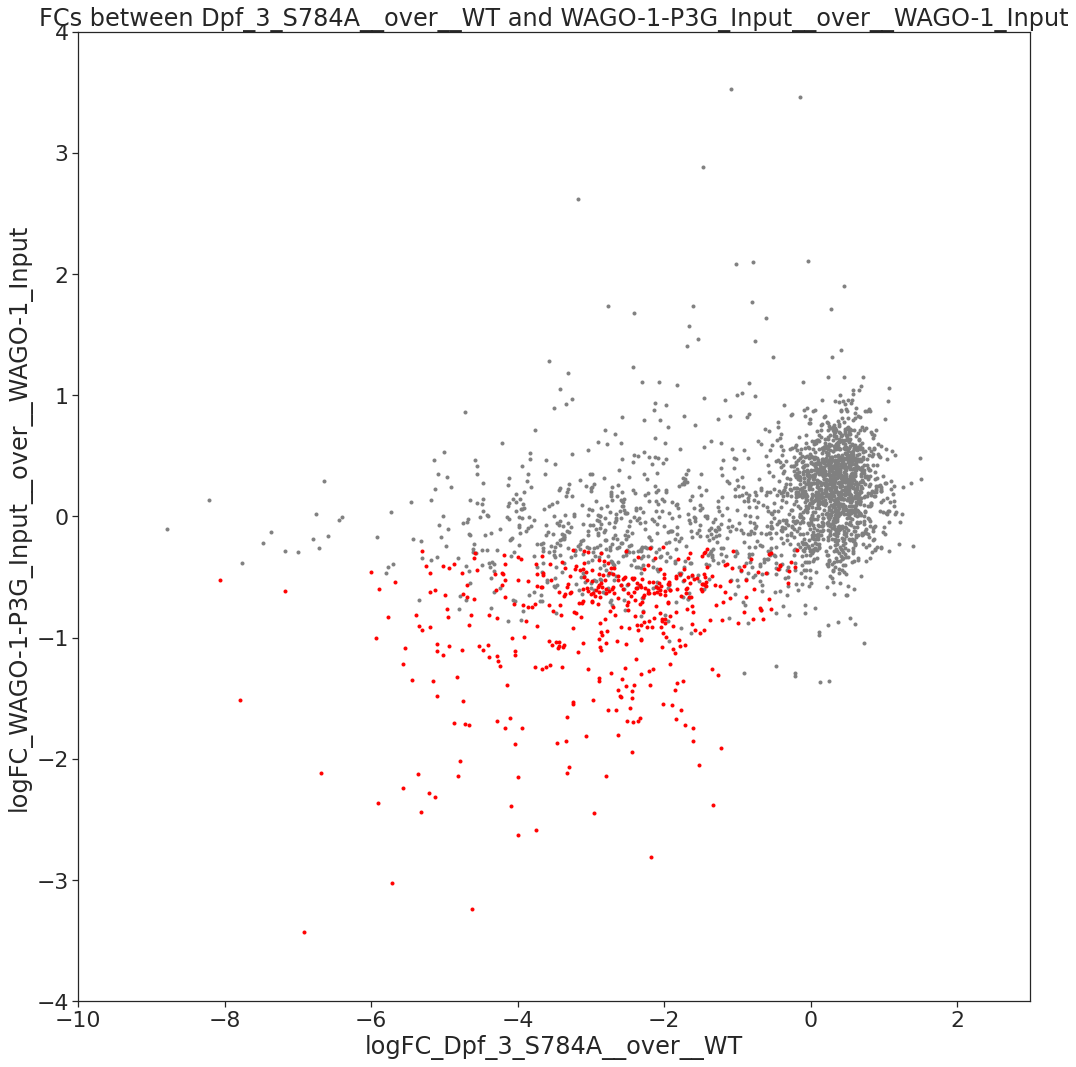

In [65]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=False)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=(-4,4))

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]<0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]<0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
                      palette=["gray", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=(-4,4))


plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

In [66]:
df_all[[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_S784A__over__WT  \
logFC_Dpf_3_S784A__over__WT                 1.000000                      
logFC_WAGO-1-P3G_Input__over__WAGO-1_Input  0.492714                      

                                            logFC_WAGO-1-P3G_Input__over__WAGO-1_Input  
logFC_Dpf_3_S784A__over__WT                 0.492714                                    
logFC_WAGO-1-P3G_Input__over__WAGO-1_Input  1.000000

In [67]:
df_all[df_all["Significant"] == f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"][[f"logFC_{df_1_name}", f"logFC_{df_2_name}"]].corr()

logFC_Dpf_3_S784A__over__WT  \
logFC_Dpf_3_S784A__over__WT                 1.000000                      
logFC_WAGO-1-P3G_Input__over__WAGO-1_Input  0.290161                      

                                            logFC_WAGO-1-P3G_Input__over__WAGO-1_Input  
logFC_Dpf_3_S784A__over__WT                 0.290161                                    
logFC_WAGO-1-P3G_Input__over__WAGO-1_Input  1.000000

## Double mutant of WAGO-1 and WAGO-3 (3135) over WAGO-1 Input vs Wago-1 P3G Input over WAGO-1 Input

In [68]:
# df_1_path = HW3135_INPUT__over__Input_WAGO_1_path
# df_1_name = HW3135_INPUT__over__Input_WAGO_1_name

# df_2_path = Input_WAGO_1_P3G__over__Input_WAGO_1_path
# df_2_name = Input_WAGO_1_P3G__over__Input_WAGO_1_name

In [69]:
# df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

# df_all["Significant"] = "No"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

# df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0) &
#            (df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))

# sns_plot = sns.lmplot(f"logFC_{df_1_name}",
#                       y=f"logFC_{df_2_name}",
#                       data=df_all,
#                       fit_reg=False,
#                       hue="Significant",
#                       hue_order=["No", 
#                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
#                                  f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
#                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
#                       palette=["gray", "black", "blue", "red"],
#                       scatter_kws={'alpha':alpha},
#                       height=height,
#                       aspect=aspect,
#                       x_jitter=x_jitter,
#                       y_jitter=y_jitter,
#                       markers=marker,
#                       legend=False)

# sns_plot = plt.gca()
# sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
# sns_plot.spines['right'].set_visible(True)
# sns_plot.spines['top'].set_visible(True)
# sns_plot.set(xlim=xlim, ylim=(-4,4))

# plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")

# df_all["Significant"] = "No"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0) &
#            (df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"


# sns_plot = sns.lmplot(f"logFC_{df_1_name}",
#                       y=f"logFC_{df_2_name}",
#                       data=df_all,
#                       fit_reg=False,
#                       hue="Significant",
#                       hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
#                       palette=["black", "red", "blue", "green"],
#                       scatter_kws={'alpha':alpha},
#                       height=height,
#                       aspect=aspect,
#                       x_jitter=x_jitter,
#                       y_jitter=y_jitter,
#                       markers=marker,
#                       legend=legend)

# sns_plot = plt.gca()
# sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
# sns_plot.spines['right'].set_visible(True)
# sns_plot.spines['top'].set_visible(True)
# sns_plot.set(xlim=xlim, ylim=(-4,4))


# plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))
# print("*"*80)

## Double mutant of WAGO-1 and WAGO-3 (3135) over WAGO-1 Input vs Wago-1::FLAG1x, Wago-3 P2G A3E (3134) over WAGO-1 Input

In [70]:
# df_1_path = HW3135_INPUT__over__Input_WAGO_1_path
# df_1_name = HW3135_INPUT__over__Input_WAGO_1_name

# df_2_path = HW3134_INPUT__over__Input_WAGO_1_path
# df_2_name = HW3134_INPUT__over__Input_WAGO_1_name

In [71]:
# df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

# df_all["Significant"] = "No"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

# df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0) &
#            (df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))

# sns_plot = sns.lmplot(f"logFC_{df_1_name}",
#                       y=f"logFC_{df_2_name}",
#                       data=df_all,
#                       fit_reg=False,
#                       hue="Significant",
#                       hue_order=["No", 
#                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0",
#                                  f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0",
#                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
#                       palette=["gray", "black", "blue", "red"],
#                       scatter_kws={'alpha':alpha},
#                       height=height,
#                       aspect=aspect,
#                       x_jitter=x_jitter,
#                       y_jitter=y_jitter,
#                       markers=marker,
#                       legend=False)

# sns_plot = plt.gca()
# sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
# sns_plot.spines['right'].set_visible(True)
# sns_plot.spines['top'].set_visible(True)
# # sns_plot.set(xlim=xlim, ylim=(-10,4))

# plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}_color.pdf")

# df_all["Significant"] = "No"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0) &
#            (df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"


# sns_plot = sns.lmplot(f"logFC_{df_1_name}",
#                       y=f"logFC_{df_2_name}",
#                       data=df_all,
#                       fit_reg=False,
#                       hue="Significant",
#                       hue_order=["No", f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}<0"],
#                       palette=["black", "red", "blue", "green"],
#                       scatter_kws={'alpha':alpha},
#                       height=height,
#                       aspect=aspect,
#                       x_jitter=x_jitter,
#                       y_jitter=y_jitter,
#                       markers=marker,
#                       legend=legend)

# sns_plot = plt.gca()
# sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
# sns_plot.spines['right'].set_visible(True)
# sns_plot.spines['top'].set_visible(True)
# # sns_plot.set(xlim=xlim, ylim=(-10,4))


# plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))
# print("*"*80)

# Repeat the last two plots in a different way

In [72]:
# df_path = HW3135_INPUT__over__Input_WAGO_1_path
# df_name = HW3135_INPUT__over__Input_WAGO_1_name

In [73]:
# df = pd.read_csv(df_path, header=0, sep="\t")
# # set id as index
# df.set_index("id", inplace=True)
# # rename columns
# df.columns = df.columns + "_" + df_name
# # reset index
# df.reset_index(inplace=True)

In [74]:
# df.head()

In [75]:
# df.shape

In [76]:
# df.columns

In [77]:
# df["Significant"] = "No"

In [78]:
# df.loc[(df[f"FDR_{df_name}"] < 0.05) & (df[f"logFC_{df_name}"] < 0), "Significant"] = "Down 3135 vs Wago-1"

In [79]:
# sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
#                       y=f"logFC_{df_name}",
#                       data=df,
#                       fit_reg=False,
#                       hue=f"Significant",
#                       hue_order=["No", "Down 3135 vs Wago-1"],
#                       palette=["grey", "black", "blue"],
#                       scatter_kws={'alpha':alpha},
#                       height=height,
#                       aspect=aspect,
#                       x_jitter=x_jitter,
#                       y_jitter=y_jitter,
#                       markers=marker,
#                       legend=True)
# sns_plot = plt.gca()
# sns_plot.set_title(f"MA plot for {df_name}")
# sns_plot.spines['right'].set_visible(True)
# sns_plot.spines['top'].set_visible(True)

In [80]:
# df_1_path = HW3134_INPUT__over__Input_WAGO_1_path
# df_1_name = HW3134_INPUT__over__Input_WAGO_1_name
# df_1 = pd.read_csv(df_1_path, header=0, sep="\t")
# HW3134_INPUT__over__Input_WAGO_1_down_list = df_1[(df_1["logFC"]<0) & (df_1["FDR"]<0.05)]["id"].tolist()

# again with all categoriees

In [81]:
# df["Significant"] = "No"

# df.loc[(df[f"FDR_{df_name}"] < 0.05) & (df[f"logFC_{df_name}"] < 0), "Significant"] = "Down 3135 vs Wago-1"

# df.loc[df.id.isin(HW3134_INPUT__over__Input_WAGO_1_down_list), "Significant"] = "Down HW3134 vs Wago-1"

# df.loc[(df[f"FDR_{df_name}"] < 0.05) & 
#        (df[f"logFC_{df_name}"] < 0) & 
#        df.id.isin(HW3134_INPUT__over__Input_WAGO_1_down_list), "Significant"] = "Both"

In [82]:
# sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
#                       y=f"logFC_{df_name}",
#                       data=df,
#                       fit_reg=False,
#                       hue=f"Significant",
#                       hue_order=["No", "Down 3135 vs Wago-1", "Down HW3134 vs Wago-1", "Both"],
#                       palette=["grey", "black", "green", "red"],
#                       scatter_kws={'alpha':alpha},
#                       height=height,
#                       aspect=aspect,
#                       x_jitter=x_jitter,
#                       y_jitter=y_jitter,
#                       markers=marker,
#                       legend=True)
# sns_plot = plt.gca()
# sns_plot.set_title(f"MA plot for {df_name}")
# sns_plot.spines['right'].set_visible(True)
# sns_plot.spines['top'].set_visible(True)

In [83]:
# df_2_path = Input_WAGO_1_P3G__over__Input_WAGO_1_path
# df_2_name = Input_WAGO_1_P3G__over__Input_WAGO_1_name
# df_2 = pd.read_csv(df_2_path, header=0, sep="\t")
# Input_WAGO_1_P3G__over__Input_WAGO_1_down_list = df_2[(df_2["logFC"]<0) & (df_2["FDR"]<0.05)]["id"].tolist()

In [84]:
# df["Significant"] = "No"

# df.loc[(df[f"FDR_{df_name}"] < 0.05) & (df[f"logFC_{df_name}"] < 0), "Significant"] = "Down 3135 vs Wago-1"

# df.loc[df.id.isin(Input_WAGO_1_P3G__over__Input_WAGO_1_down_list), "Significant"] = "Down WAGO-1 P3G vs Wago-1"

# df.loc[(df[f"FDR_{df_name}"] < 0.05) & 
#        (df[f"logFC_{df_name}"] < 0) & 
#        df.id.isin(Input_WAGO_1_P3G__over__Input_WAGO_1_down_list), "Significant"] = "Both"

In [85]:
# sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
#                       y=f"logFC_{df_name}",
#                       data=df,
#                       fit_reg=False,
#                       hue=f"Significant",
#                       hue_order=["No", "Down 3135 vs Wago-1", "Down WAGO-1 P3G vs Wago-1", "Both"],
#                       palette=["grey", "black", "green", "red"],
#                       scatter_kws={'alpha':alpha},
#                       height=height,
#                       aspect=aspect,
#                       x_jitter=x_jitter,
#                       y_jitter=y_jitter,
#                       markers=marker,
#                       legend=True)
# sns_plot = plt.gca()
# sns_plot.set_title(f"MA plot for {df_name}")
# sns_plot.spines['right'].set_visible(True)
# sns_plot.spines['top'].set_visible(True)